In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

%matplotlib inline
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

# 링크
## Preprocessing
- [Patient_info](#Patient_info) 
- [Region](#Region) 
- [Weather](#Weather) 
- [Search_Trend](#Search_Trend) 
- [Policy](#Policy) 


## Analyze
[1. 확진자 분석](#1.확진자분석) 
- [성별](#성별) 
- [지역](#지역)   
- [나이](#나이)   
- [혼합](#혼합) 

[2. 날씨 - 확진자 분석](#2.날씨-확진자분석) 
- [전국](#전국) 
- [지역별](#지역별) 

[3. 검색 빈도 - 확진자 분석](#3.검색빈도-확진자분석)  
- [전체](#전체)  
- [월별](#월별)

[4. 정책 시행일 - 확진자 분석](#4.정책시행일-확진자분석) 
- [날짜](#날짜)


## Competition 발표에 쓰인 시각화코드
- [ppt 7](#ppt7) 
- [ppt 8](#ppt8) 
- [ppt 9](#ppt9)
- [ppt 10](#ppt10)

# Import Data

In [2]:
# Main Data
patient_info = pd.read_csv('./data/PatientInfo.csv')
region = pd.read_csv('./data/Region.csv')
weather = pd.read_csv('./data/Weather.csv')
search = pd.read_csv('./data/Searchtrend.csv')

# Sub data
policy = pd.read_csv('./data/Policy.csv')
case = pd.read_csv('./data/Case.csv')

# Preprocessing
전처리 수행(결측값 처리, 중복값 처리, 이상치 처리 등)

공통 함수

In [3]:
# 남, 북도로 나눠진 province열 value값 하나로 결합
def region_mix(data):
    data.loc[data['province']=="Chungcheongbuk-do", "province"]="Chungcheong-do"
    data.loc[data['province']=="Chungcheongnam-do", "province"]="Chungcheong-do"
    data.loc[data['province']=="Gyeongsangbuk-do", "province"]="Gyeongsang-do"
    data.loc[data['province']=="Gyeongsangnam-do", "province"]="Gyeongsang-do"
    data.loc[data['province']=="Jeollabuk-do", "province"]="Jeolla-do"
    data.loc[data['province']=="Jeollanam-do", "province"]="Jeolla-do"

In [4]:
# 날짜 datetime으로 변경
# 데이터 타입 바꾸기
def date_type(data,date_new,date_name):  
    if date_name == 'date':
        data.rename(columns={date_name:'date_'},inplace=True)
        date_name = 'date_'
    data[date_new] = pd.to_datetime(data[date_name], format='%Y-%m-%d')
    data['year'] = data[date_new].dt.year.astype('int')
    data['month'] = data[date_new].dt.month.astype('int')
    data['day'] = data[date_new].dt.day.astype('int')
    data = data.drop(date_name,axis=1)
    return data

### Patient_info

변수 설명
- patient_id : 환자 ID   
- sex : 환자의 성별   
- age : 환자의 연령층  
- country : 환자의 국적   
- province : 감염 주소지(시)
- city : 감염 주소지(도)
- infection_case : 감염 경로   
- infected_by : 누구로 인해 감염되었는지(감염시킨 환자 번호)  
- contact_number : 접촉자 수  
- symptom_onset_date : 증상 발생일  
- confirm_date : 확진 판정일  
- relased_date : 격리 해제일  
- deceased_date : 사망일
- state : 현재 상태
<br>

- patient_info : 확진자 전처리 데이터
- patient_info_(age_level) : age_level에 따른 확진자 데이터
- region_mix(data) : 지역 남, 북 결합 함수
- date_type(data,date_new,date_name) : 날짜 데이터 datetiem형식, 데이터 타입 int로 변경 \
data : 전처리할 데이터 \
date_new : 날짜의 새로운 이름 \
date_name : 처리해야할 날짜 열 이름 

In [5]:
# before
patient_info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [6]:
# 결측치 많음.
patient_info.isna().sum()

patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

In [7]:
# NaN값을 dont know로 수정
patient_info['infection_case'].value_counts(normalize=True, dropna=False)
patient_info['infection_case'] = patient_info['infection_case'].fillna('dont know')
patient_info['infection_case'].value_counts(normalize=True, dropna=False)

contact with patient                             0.311713
dont know                                        0.177928
overseas inflow                                  0.162633
etc                                              0.136108
Itaewon Clubs                                    0.031365
Richway                                          0.024782
Guro-gu Call Center                              0.021684
Shincheonji Church                               0.020716
Coupang Logistics Center                         0.015489
Yangcheon Table Tennis Club                      0.008519
Day Care Center                                  0.008325
SMR Newly Planted Churches Group                 0.006970
Onchun Church                                    0.006389
Bonghwa Pureun Nursing Home                      0.006002
gym facility in Cheonan                          0.005808
Ministry of Oceans and Fisheries                 0.005421
Wangsung Church                                  0.004647
Cheongdo Daena

In [8]:
#성별과 나이를 밝히기 싫어서 안적었다고 추측

In [9]:
# 성별을 모르면 0으로 처리
patient_info['sex'] = patient_info['sex'].fillna('0')
patient_info['sex'].value_counts(normalize=True)

female    0.429429
male      0.353340
0         0.217231
Name: sex, dtype: float64

In [10]:
# 나이를 모르면 0으로 처리
patient_info['age'] = patient_info['age'].fillna('0')
patient_info['age'].value_counts(normalize=True)

0       0.267183
20s     0.174056
50s     0.129138
30s     0.101258
40s     0.100290
60s     0.093320
70s     0.044918
10s     0.034463
80s     0.032914
0s      0.012778
90s     0.009487
100s    0.000194
Name: age, dtype: float64

In [11]:
#etc가 있어서 결측치를 etc로 처리하였음
patient_info['city'] = patient_info['city'].fillna('etc')
patient_info['city'].value_counts(normalize=True, dropna=False)

Gyeongsan-si      0.123717
etc               0.039497
Seongnam-si       0.033495
Bucheon-si        0.031365
Gwanak-gu         0.021878
                    ...   
sankyeock-dong    0.000194
Gijang-gun        0.000194
Dalseong-gun      0.000194
Hoengseong-gun    0.000194
Yeongwol-gun      0.000194
Name: city, Length: 163, dtype: float64

In [12]:
#감염시킨 환자번호,접촉자 수,증상 발생일 제거
patient_info = patient_info.drop(['infected_by','contact_number','symptom_onset_date'], axis = 1)

In [13]:
# confirmed_date 결측치 제거
patient_info = patient_info.dropna(subset=['confirmed_date'])

In [14]:
# 남, 북 결합
region_mix(patient_info)

In [15]:
patient_info2 = patient_info.rename(columns={'confirmed_date':'date'})

In [16]:
# 날씨 datetype 변경
patient_info = date_type(patient_info,'date','confirmed_date')
patient_info.rename(columns={'confirmed_date':'date'},inplace=True)

In [17]:
# weather 데이터의 날짜는 2020-06-29까지 있으므로 기간 축소
patient_info = patient_info.loc[patient_info['date'] <= "2020-06-29" ]

In [18]:
patient_info.insert(3, 'age_level', patient_info['age'])
# 연령대 구분 : 1. 미성년자 (~ 20) 2. 청년 (20 ~ 60) 3. 노인(60 ~)
patient_info.loc[patient_info['age']=='0s', 'age_level'] = '1'
patient_info.loc[patient_info['age']=='10s', 'age_level'] = '1'
patient_info.loc[patient_info['age']=='20s', 'age_level'] = '2'
patient_info.loc[patient_info['age']=='30s', 'age_level'] = '2'
patient_info.loc[patient_info['age']=='40s', 'age_level'] = '3'
patient_info.loc[patient_info['age']=='50s', 'age_level'] = '3'
patient_info.loc[patient_info['age']=='60s', 'age_level'] = '4'
patient_info.loc[patient_info['age']=='70s', 'age_level'] = '4'
patient_info.loc[patient_info['age']=='80s', 'age_level'] = '5'
patient_info.loc[patient_info['age']=='90s', 'age_level'] = '5'
patient_info.loc[patient_info['age']=='100s', 'age_level'] = '5'

# 나이 결측값 중 감염경로가 Itaewon Clubs인 사람은 청년으로 처리
patient_info.loc[patient_info['infection_case']=='Itaewon Clubs', 'age_level'] = '2'

# age_level의 타입을 int로 변경
patient_info = patient_info.astype({'age_level':'int'})

# age_level이 0인 사람은 삭제
patient_info = patient_info[patient_info['age_level'] != 0]

In [19]:
# age_level 1
patients_1 = patient_info[patient_info['age_level'] == 1]
patients_1

,patient_id,sex,age,age_level,country,province,city,infection_case,released_date,deceased_date,state,date,year,month,day
78,1000000079,female,10s,1,Korea,Seoul,Nowon-gu,Seongdong-gu APT,NaN,NaN,released,2020-02-28,2020,2,28
86,1000000087,male,10s,1,Korea,Seoul,Nowon-gu,Seongdong-gu APT,NaN,NaN,released,2020-02-28,2020,2,28
100,1000000101,female,10s,1,Korea,Seoul,Jungnang-gu,contact with patient,NaN,NaN,released,2020-03-04,2020,3,4
103,1000000104,female,10s,1,Korea,Seoul,Gangbuk-gu,etc,NaN,NaN,released,2020-03-05,2020,3,5
111,1000000112,female,0s,1,Korea,Seoul,Gwanak-gu,contact with patient,NaN,NaN,released,2020-03-07,2020,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,6100000110,male,0s,1,Korea,Gyeongsang-do,Changwon-si,etc,NaN,NaN,released,2020-04-05,2020,4,5
5126,6100000114,female,0s,1,Korea,Gyeongsang-do,Jinju-si,overseas inflow,NaN,NaN,released,2020-04-08,2020,4,8
5138,6100000126,female,10s,1,Korea,Gyeongsang-do,Yangsan-si,etc,NaN,NaN,isolated,2020-06-09,2020,6,9
5153,7000000008,female,10s,1,Korea,Jeju-do,Jeju-do,overseas inflow,2020-04-12,NaN,released,2020-03-27,2020,3,27


In [20]:
# age_level 2
patients_2 = patient_info[patient_info['age_level'] == 2]
patients_2

,patient_id,sex,age,age_level,country,province,city,infection_case,released_date,deceased_date,state,date,year,month,day
1,1000000002,male,30s,2,Korea,Seoul,Jungnang-gu,overseas inflow,2020-03-02,NaN,released,2020-01-30,2020,1,30
3,1000000004,male,20s,2,Korea,Seoul,Mapo-gu,overseas inflow,2020-02-15,NaN,released,2020-01-30,2020,1,30
4,1000000005,female,20s,2,Korea,Seoul,Seongbuk-gu,contact with patient,2020-02-24,NaN,released,2020-01-31,2020,1,31
6,1000000007,male,20s,2,Korea,Seoul,Jongno-gu,contact with patient,2020-02-10,NaN,released,2020-01-31,2020,1,31
7,1000000008,male,20s,2,Korea,Seoul,etc,overseas inflow,2020-02-24,NaN,released,2020-02-02,2020,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,7000000010,female,20s,2,Korea,Jeju-do,Jeju-do,overseas inflow,2020-04-21,NaN,released,2020-04-03,2020,4,3
5156,7000000011,male,30s,2,Korea,Jeju-do,Jeju-do,contact with patient,2020-05-19,NaN,released,2020-04-03,2020,4,3
5157,7000000012,female,20s,2,Korea,Jeju-do,Jeju-do,overseas inflow,2020-05-05,NaN,released,2020-04-03,2020,4,3
5159,7000000014,female,30s,2,Korea,Jeju-do,Jeju-do,Itaewon Clubs,2020-06-12,NaN,released,2020-05-09,2020,5,9


In [21]:
# age_level 3
patients_3 = patient_info[patient_info['age_level'] == 3]
patients_3

,patient_id,sex,age,age_level,country,province,city,infection_case,released_date,deceased_date,state,date,year,month,day
0,1000000001,male,50s,3,Korea,Seoul,Gangseo-gu,overseas inflow,2020-02-05,NaN,released,2020-01-23,2020,1,23
2,1000000003,male,50s,3,Korea,Seoul,Jongno-gu,contact with patient,2020-02-19,NaN,released,2020-01-30,2020,1,30
5,1000000006,female,50s,3,Korea,Seoul,Jongno-gu,contact with patient,2020-02-19,NaN,released,2020-01-31,2020,1,31
10,1000000011,female,50s,3,China,Seoul,Seodaemun-gu,overseas inflow,2020-02-29,NaN,released,2020-02-06,2020,2,6
22,1000000023,male,50s,3,Korea,Seoul,Seocho-gu,Shincheonji Church,NaN,NaN,released,2020-02-21,2020,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5140,6100000128,male,40s,3,Korea,Gyeongsang-do,Geoje-si,overseas inflow,NaN,NaN,released,2020-06-14,2020,6,14
5141,6100000129,male,40s,3,Korea,Gyeongsang-do,Geoje-si,overseas inflow,NaN,NaN,isolated,2020-06-14,2020,6,14
5143,6100000131,male,40s,3,Korea,Gyeongsang-do,Geoje-si,overseas inflow,NaN,NaN,isolated,2020-06-15,2020,6,15
5148,7000000003,female,40s,3,Korea,Jeju-do,etc,etc,2020-03-15,NaN,released,2020-03-02,2020,3,2


In [22]:
# age_level 4
patients_4 = patient_info[patient_info['age_level'] == 4]
patients_4

,patient_id,sex,age,age_level,country,province,city,infection_case,released_date,deceased_date,state,date,year,month,day
9,1000000010,female,60s,4,Korea,Seoul,Seongbuk-gu,contact with patient,2020-02-29,NaN,released,2020-02-05,2020,2,5
13,1000000014,female,60s,4,Korea,Seoul,Jongno-gu,contact with patient,2020-03-12,NaN,released,2020-02-16,2020,2,16
14,1000000015,male,70s,4,Korea,Seoul,Seongdong-gu,Seongdong-gu APT,NaN,NaN,released,2020-02-19,2020,2,19
15,1000000016,male,70s,4,Korea,Seoul,Jongno-gu,contact with patient,2020-03-11,NaN,released,2020-02-19,2020,2,19
16,1000000017,male,70s,4,Korea,Seoul,Jongno-gu,contact with patient,2020-03-01,NaN,released,2020-02-20,2020,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,6100000100,female,60s,4,Korea,Gyeongsang-do,Jinju-si,etc,NaN,NaN,released,2020-03-31,2020,3,31
5116,6100000104,female,70s,4,Korea,Gyeongsang-do,Sancheong-gun,etc,NaN,NaN,released,2020-03-31,2020,3,31
5124,6100000112,male,60s,4,Korea,Gyeongsang-do,Hapcheon-gun,contact with patient,NaN,NaN,released,2020-04-07,2020,4,7
5128,6100000116,male,60s,4,Korea,Gyeongsang-do,Changwon-si,etc,2020-05-15,NaN,released,2020-04-21,2020,4,21


In [23]:
# age_level 5
patients_5 = patient_info[patient_info['age_level'] == 5]
patients_5

,patient_id,sex,age,age_level,country,province,city,infection_case,released_date,deceased_date,state,date,year,month,day
12,1000000013,male,80s,5,Korea,Seoul,Jongno-gu,contact with patient,NaN,NaN,deceased,2020-02-16,2020,2,16
20,1000000021,male,80s,5,Korea,Seoul,Jongno-gu,contact with patient,2020-03-08,NaN,released,2020-02-20,2020,2,20
53,1000000054,female,80s,5,Korea,Seoul,Eunpyeong-gu,Eunpyeong St. Mary's Hospital,NaN,NaN,released,2020-02-27,2020,2,27
59,1000000060,male,80s,5,Korea,Seoul,Eunpyeong-gu,Eunpyeong St. Mary's Hospital,NaN,NaN,released,2020-02-28,2020,2,28
108,1000000109,male,90s,5,Korea,Seoul,etc,contact with patient,NaN,NaN,deceased,2020-03-07,2020,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6020000031,female,80s,5,Korea,Gyeongsang-do,Cheongdo-gun,dont know,NaN,NaN,released,2020-03-06,2020,3,6
4895,6020000032,female,80s,5,Korea,Gyeongsang-do,Cheongdo-gun,dont know,NaN,NaN,released,2020-03-07,2020,3,7
4897,6020000034,female,80s,5,Korea,Gyeongsang-do,Cheongdo-gun,dont know,NaN,NaN,released,2020-03-09,2020,3,9
4899,6020000036,female,90s,5,Korea,Gyeongsang-do,Cheongdo-gun,dont know,NaN,NaN,released,2020-03-13,2020,3,13


# 결측치

In [24]:
# after
patient_info

,patient_id,sex,age,age_level,country,province,city,infection_case,released_date,deceased_date,state,date,year,month,day
0,1000000001,male,50s,3,Korea,Seoul,Gangseo-gu,overseas inflow,2020-02-05,NaN,released,2020-01-23,2020,1,23
1,1000000002,male,30s,2,Korea,Seoul,Jungnang-gu,overseas inflow,2020-03-02,NaN,released,2020-01-30,2020,1,30
2,1000000003,male,50s,3,Korea,Seoul,Jongno-gu,contact with patient,2020-02-19,NaN,released,2020-01-30,2020,1,30
3,1000000004,male,20s,2,Korea,Seoul,Mapo-gu,overseas inflow,2020-02-15,NaN,released,2020-01-30,2020,1,30
4,1000000005,female,20s,2,Korea,Seoul,Seongbuk-gu,contact with patient,2020-02-24,NaN,released,2020-01-31,2020,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,7000000011,male,30s,2,Korea,Jeju-do,Jeju-do,contact with patient,2020-05-19,NaN,released,2020-04-03,2020,4,3
5157,7000000012,female,20s,2,Korea,Jeju-do,Jeju-do,overseas inflow,2020-05-05,NaN,released,2020-04-03,2020,4,3
5158,7000000013,female,10s,1,China,Jeju-do,Jeju-do,overseas inflow,2020-04-26,NaN,released,2020-04-14,2020,4,14
5159,7000000014,female,30s,2,Korea,Jeju-do,Jeju-do,Itaewon Clubs,2020-06-12,NaN,released,2020-05-09,2020,5,9


### Region

변수 설명
- code : 지역 코드
- proince : 지역(시도)
- city : 지역(시군)
- latitude : 위도   
- longitude : 경도  
- elementary_school_count : 초등학교 수  
- kindergarten_count : 유치원 수  
- university_count : 대학교 수  
- academy_ratio : 학원 비율  
- elderly_population_ratio : 노인 인구 비율  
- elderly_alone_ratio : 독거노인 비율   
- nursing_home_count : 요양원 수 
<br>

- region_code : 전처리된 지역 정보 데이터
- region_code2 : 전국 노인비율 시각화에 필요한 지역 정보 데이터
- region_code3 : 서울,경기,경북 노인비율 시각화에 필요한 지역 정보 데이터
- region_city : 지역(시군)별 전처리 데이터 함수
- region_지역 : 각 지역 정보 데이터
- region_mix(data) : 지역 남, 북 결합 함수

In [25]:
# before
region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


In [26]:
region.isnull().sum() # 결측치 없음

code                        0
province                    0
city                        0
latitude                    0
longitude                   0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

In [27]:
col = ['latitude','longitude'] # 위도, 경도열 삭제
region = region.drop(columns=col)

In [28]:
region_mix(region)

In [29]:
# 지역(시도,province) 별 모음
# code 필요없음 / province = city 이므로 city 삭제
c1 = region['code'] % 1000 == 0
c2 = region['code'] != 80000
c = c1 & c2
col = ['code','city']
region_code = region.loc[c,]
region_code = region_code.drop(columns = col)
region_code.reset_index(drop=True,inplace=True)

In [30]:
def m_mean(x):
    return np.mean(x)
def m_sum(x):
    return np.sum(x)
col_s = ['elementary_school_count','kindergarten_count','university_count','nursing_home_count']
col_m = ['academy_ratio','elderly_population_ratio','elderly_alone_ratio']

region_code = region_code.groupby('province').agg({'elementary_school_count':m_sum
                                     ,'kindergarten_count':m_sum
                                     ,'university_count':m_sum
                                     ,'academy_ratio':m_mean
                                     ,'elderly_population_ratio':m_mean
                                     ,'elderly_alone_ratio':m_mean
                                     ,'nursing_home_count':m_sum})

In [31]:
# city(지역구) 기준으로
def region_city(province):
    col = ['code','province']
    # code 필요없음 / province = city 이므로 city 삭제
    c1 = region['province'] == province
    c2 = region['code'] % 1000 != 0 
    c = c1 & c2

    region_code3 = region.loc[c,]
    region_code3 = region_code3.drop(columns = col)
    region_code3.reset_index(drop=True,inplace=True)
    return region_code3

In [32]:
region_code2 = region_code.reset_index()

In [33]:
c1 = region_code2['province']=='Seoul'
c2 = region_code2['province']=='Gyeonggi-do'
c3 = region_code2['province']=='Gyeongsang-do'
c = c1 | c2 | c3
region_code3 = region_code2.loc[c]

In [34]:
# after
region_code

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
province,,,,,,,
Busan,304,408,22,1.400,18.410,8.6,6752
Chungcheong-do,668,827,38,1.385,17.840,8.7,6410
Daegu,229,355,11,1.620,15.780,7.5,5083
Daejeon,148,260,15,1.490,13.650,5.8,2984
Gangwon-do,349,368,18,1.420,19.890,9.8,2519
Gwangju,155,312,17,2.380,13.570,6.4,2852
Gyeonggi-do,1277,2237,61,1.600,12.630,5.2,20491
Gyeongsang-do,972,1393,54,1.555,18.680,10.1,9838
Incheon,250,403,7,1.270,13.200,5.8,4497


### Weather

변수 설명
- code : 날씨 코드   
- province : 지역   
- date : 날짜   
- ave_temp : 평균 기온   
- min_temp : 최저 기온   
- max_temp : 최고 기온   
- precipitation : 강수량        
- max_wind_speed : 최고 풍속   
- most_wind_direction : 주된 바람 방향    
- avg_relative_humidity : 평균 상대습도
<br>

- weather : 전처리된 데이터
- region_mix(data) : 지역 남, 북 결합 함수
- date_type(data,date_new,date_name) : 날짜 데이터 datetiem형식, 데이터 타입 int로 변경 \
data : 전처리할 데이터 \
date_new : 날짜의 새로운 이름 \
date_name : 처리해야할 날짜 열 이름 

In [35]:
# before
weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
26266,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
26267,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
26268,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
26269,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


In [36]:
#결측값이 있는 행 제거
weather.dropna(inplace = True) 

#충청북도 오타가 있음
weather.loc[weather['province']=="Chunghceongbuk-do", "province"]="Chungcheongbuk-do" 

# 남, 북도로 나눠진 value값 하나로 결합
region_mix(weather)

In [37]:
# code, min_temp, max_temp, most_wind_direction 열 삭제
weather.drop("code", axis=1, inplace=True)
weather.drop("min_temp", axis=1, inplace=True)
weather.drop("max_temp", axis=1, inplace=True)
weather.drop("most_wind_direction", axis=1, inplace=True)

In [38]:
# 날씨 datetype 변경
weather = date_type(weather,'date','date')

In [39]:
# patient_Info 데이터의 날짜가 2020-01-20 ~ 2020-06-29까지 있으므로 기간 축소
weather = weather.loc[weather['date'] >= "2020-01-20" ]

In [40]:
# after
weather

,province,avg_temp,precipitation,max_wind_speed,avg_relative_humidity,date,year,month,day
23679,Seoul,0.7,0.0,5.7,46.8,2020-01-20,2020,1,20
23680,Busan,5.1,0.0,6.1,45.6,2020-01-20,2020,1,20
23681,Daegu,4.6,0.0,6.4,44.1,2020-01-20,2020,1,20
23682,Gwangju,4.0,0.0,3.3,63.1,2020-01-20,2020,1,20
23683,Incheon,1.2,0.0,8.6,56.0,2020-01-20,2020,1,20
...,...,...,...,...,...,...,...,...,...
26266,Jeolla-do,22.0,27.6,4.4,85.1,2020-06-29,2020,6,29
26267,Jeolla-do,21.9,80.5,16.8,97.9,2020-06-29,2020,6,29
26268,Gyeongsang-do,20.4,43.9,4.5,90.9,2020-06-29,2020,6,29
26269,Gyeongsang-do,21.9,98.9,5.8,85.0,2020-06-29,2020,6,29


### Search_Trend

변수 설명
- date : 데이터 집계 날짜   
- cold : '감기' 검색 비율    
- flu : '독감' 검색 비율   
- pneumonia : '폐렴' 검색 비율    
- coronavirus : '코로나' 검색 비율
<br>

- search : 전처리된 search 데이터

In [41]:
# before
search

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...,...
1637,2020-06-25,0.12072,0.04190,0.11936,2.16993
1638,2020-06-26,0.11381,0.03027,0.11317,2.15139
1639,2020-06-27,0.10554,0.02136,0.08354,1.96848
1640,2020-06-28,0.12563,0.02872,0.08072,2.19720


In [42]:
# 결측치 없음
search.isna().sum()

date           0
cold           0
flu            0
pneumonia      0
coronavirus    0
dtype: int64

In [43]:
# 날짜 datetime 변경
search = date_type(search,'date','date')

In [44]:
# patient_Info 데이터의 날짜가 2020-01-20 ~ 2020-06-30까지 있으므로 기간 축소
search = search.loc[search['date'] >= "2020-01-20" ]

In [45]:
# after
search

,cold,flu,pneumonia,coronavirus,date,year,month,day
1480,0.19217,0.70343,3.63716,20.69610,2020-01-20,2020,1,20
1481,0.22462,0.59789,4.31987,35.33284,2020-01-21,2020,1,21
1482,0.23808,0.56661,3.66416,29.74474,2020-01-22,2020,1,22
1483,0.30308,0.55625,3.18035,100.00000,2020-01-23,2020,1,23
1484,0.34689,0.40226,2.48156,86.11541,2020-01-24,2020,1,24
...,...,...,...,...,...,...,...,...
1637,0.12072,0.04190,0.11936,2.16993,2020-06-25,2020,6,25
1638,0.11381,0.03027,0.11317,2.15139,2020-06-26,2020,6,26
1639,0.10554,0.02136,0.08354,1.96848,2020-06-27,2020,6,27
1640,0.12563,0.02872,0.08072,2.19720,2020-06-28,2020,6,28


### Policy

변수 설명
- policy_id : 정책 ID
- type : 정책의 유형   
- gov_policy : 정책명   
- detail : 정책 세부사항
- start_date : 정책 시작일  
- end_date : 정책 종료일  
<br>

- date_range(start, end) : 원하는 기간의 모든 날짜를 리스트로 반환하는 함수
- dates : date_range 함수의 반환값으로 만든 데이터프레임
- policy_date : policy 데이터프레임에서 'type', 'gov_policy', 'start_date' 열만 가져온 데이터프레임
- m1 : 2020년 1월 1일부터 2020년 6월 30일까지 날짜별 확진자 수를 보여주는 데이터프레임
- m2 :policy_date에서 정책 시행 날짜별 확진자 수 열을 추가한 데이터프레임

In [46]:
def date_range(start, end):
    start = datetime.datetime.strptime(start, "%Y-%m-%d")
    end = datetime.datetime.strptime(end, "%Y-%m-%d")
    dates = [date.strftime("%Y-%m-%d") for date in pd.date_range(start, periods=(end-start).days+1)]
    return dates
    
d = date_range("2020-01-01", "2020-06-29")

dates = pd.DataFrame(d, columns=['date'])
dates

,date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
176,2020-06-25
177,2020-06-26
178,2020-06-27
179,2020-06-28


In [47]:
policy_date = policy[['type', 'gov_policy', 'start_date']]
# policy_date.rename(columns={'start_date':'date'},inplace=True) # 이름을 바꿨어요
policy_date

,type,gov_policy,start_date
0,Alert,Infectious Disease Alert Level,2020-01-03
1,Alert,Infectious Disease Alert Level,2020-01-20
2,Alert,Infectious Disease Alert Level,2020-01-28
3,Alert,Infectious Disease Alert Level,2020-02-23
4,Immigration,Special Immigration Procedure,2020-02-04
...,...,...,...
56,Transformation,Logistics center,2020-05-29
57,Transformation,Wearing of masks,2020-05-27
58,Transformation,Wearing of masks,2020-05-26
59,Technology,KI-Pass: Korea Internet - Pass,2020-06-10


In [48]:
patients_date = patient_info2.groupby('date')[['patient_id']].count().reset_index()
patients_date.rename(columns={'patient_id':'patient_count'}, inplace=True)
patients_date

,date,patient_count
0,2020-01-20,1
1,2020-01-23,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,4
...,...,...
143,2020-06-26,40
144,2020-06-27,48
145,2020-06-28,38
146,2020-06-29,25


In [49]:
m1 = pd.merge(dates, patients_date, how='left', left_on='date', right_on='date')[['date', 'patient_count']]
m1['patient_count'] = m1['patient_count'].fillna(0)
m1

,date,patient_count
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0
...,...,...
176,2020-06-25,33.0
177,2020-06-26,40.0
178,2020-06-27,48.0
179,2020-06-28,38.0


In [50]:
m2 = pd.merge(policy_date, patients_date, how='left', left_on='start_date', right_on='date')
m2 = m2[['start_date', 'type', 'gov_policy', 'patient_count']]
m2['patient_count'] = m2['patient_count'].fillna(0)
m2

,start_date,type,gov_policy,patient_count
0,2020-01-03,Alert,Infectious Disease Alert Level,0.0
1,2020-01-20,Alert,Infectious Disease Alert Level,1.0
2,2020-01-28,Alert,Infectious Disease Alert Level,0.0
3,2020-02-23,Alert,Infectious Disease Alert Level,75.0
4,2020-02-04,Immigration,Special Immigration Procedure,0.0
...,...,...,...,...
56,2020-05-29,Transformation,Logistics center,37.0
57,2020-05-27,Transformation,Wearing of masks,77.0
58,2020-05-26,Transformation,Wearing of masks,37.0
59,2020-06-10,Technology,KI-Pass: Korea Internet - Pass,38.0


# Analyze
데이터 분석(상관 관계, 추세, 변동 등)

## 1.확진자분석

### 성별
- 성별 수, 비율 
- 사망 수,비율
- 격리 해제 수, 비율 

### 지역
- 확진자 수, 비율
- 사망 수, 비율
- 격리 해제 수, 비율

### 나이
- 확진자 수, 비율
- 사망 수, 비율
- 격리 해제 수, 비율

### 혼합
- 나이 - 성별에 따른 확진자 수
- 지역 - 성별에 따른 확진자 수
- 나이 - 지역에 따른 확진자 수

사용 함수

In [51]:
# 환자 수
def patients(*dfs):
    return [df['patient_id'].count() for df in dfs]

# 사망 환자 수
def deceased(*dfs):
    return [df['deceased_date'].count() for df in dfs]

# 격리 해제 환자 수
def released(*dfs):
    return [df['released_date'].count() for df in dfs]

# 사망 비율
def deceased_ratio(*dfs):
    return [df['deceased_date'].count() / df['patient_id'].count() for df in dfs]

# 격리 해제 비율
def released_ratio(*dfs):
    return [df['released_date'].count() / df['patient_id'].count() for df in dfs]

# 출력
def print_plt(x, y, title):
    for i in range(len(x)):
        print(x[i], title, ':', y[i])

### 확진자의 성별 관련

In [52]:
# 성별
sex = ['여성', '남성']
patients_f = patient_info[patient_info['sex'] == 'female']
patients_m = patient_info[patient_info['sex'] == 'male']

여성 환자 수 : 2064
남성 환자 수 : 1716


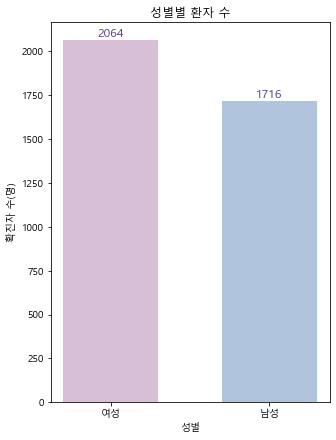

In [53]:
# 성별별 환자 수
patients_sex = patients(patients_f, patients_m)
print_plt(sex, patients_sex, '환자 수')

# 시각화
plt.figure(figsize = (5, 7))

plt.bar(sex, patients_sex, width=0.6, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(sex):
    plt.text(v, patients_sex[i], patients_sex[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('성별')
plt.ylabel('확진자 수(명)')
plt.title('성별별 환자 수')

plt.show()

여성 사망 환자 수 : 26
남성 사망 환자 수 : 40


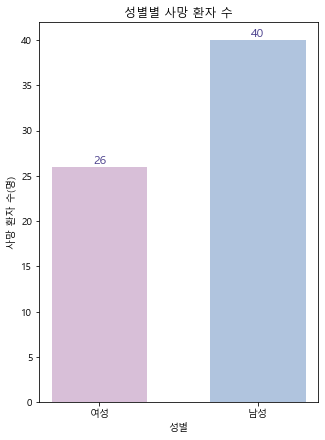

In [54]:
# 성별별 사망 환자 수
deceased_sex = deceased(patients_f, patients_m)
print_plt(sex, deceased_sex, '사망 환자 수')

# 시각화
plt.figure(figsize = (5, 7))

plt.bar(sex, deceased_sex, width=0.6, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(sex):
    plt.text(v, deceased_sex[i], deceased_sex[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('성별')
plt.ylabel('사망 환자 수(명)')
plt.title('성별별 사망 환자 수')

plt.show()

여성 격리 해제 환자 수 : 905
남성 격리 해제 환자 수 : 672


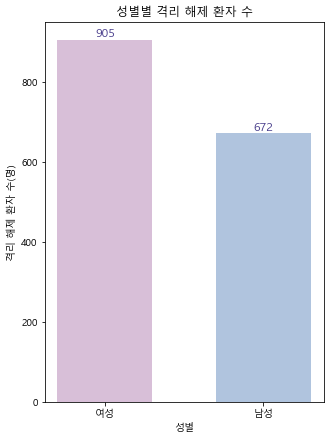

In [55]:
# 성별별 격리 해제 환자 수
released_sex = released(patients_f, patients_m)
print_plt(sex, released_sex, '격리 해제 환자 수')

# 시각화
plt.figure(figsize = (5, 7))

plt.bar(sex, released_sex, width=0.6, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(sex):
    plt.text(v, released_sex[i], released_sex[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('성별')
plt.ylabel('격리 해제 환자 수(명)')
plt.title('성별별 격리 해제 환자 수')

plt.show()

여성 사망 비율 : 0.012596899224806201
남성 사망 비율 : 0.023310023310023312


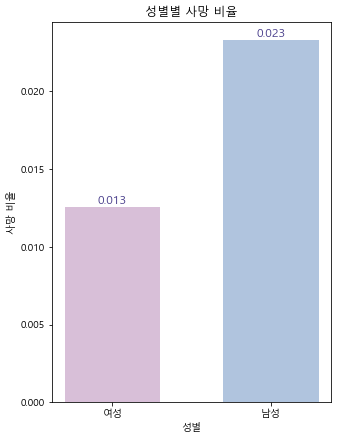

In [56]:
# 성별별 사망 비율
deceased_ratio_sex = deceased_ratio(patients_f, patients_m)
print_plt(sex, deceased_ratio_sex, '사망 비율')

# 시각화
plt.figure(figsize = (5, 7))

plt.bar(sex, deceased_ratio_sex, width=0.6, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(sex):
    plt.text(v, deceased_ratio_sex[i], round(deceased_ratio_sex[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('성별')
plt.ylabel('사망 비율')
plt.title('성별별 사망 비율')

plt.show()

여성 격리 해제 비율 : 0.438468992248062
남성 격리 해제 비율 : 0.3916083916083916


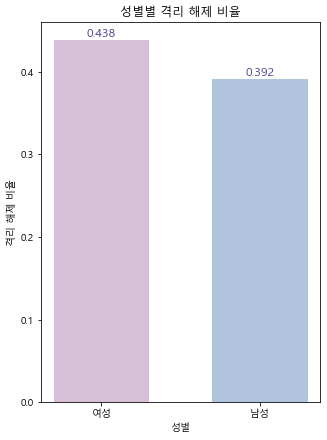

In [57]:
# 성별별 격리 해제 비율
released_ratio_sex = released_ratio(patients_f, patients_m)
print_plt(sex, released_ratio_sex, '격리 해제 비율')

# 시각화
plt.figure(figsize = (5, 7))

plt.bar(sex, released_ratio_sex, width=0.6, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(sex):
    plt.text(v, released_ratio_sex[i], round(released_ratio_sex[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('성별')
plt.ylabel('격리 해제 비율')
plt.title('성별별 격리 해제 비율')

plt.show()

### 확진자 지역 관련

In [58]:
region = patient_info['province'].unique()
patients_regions = [patient_info[patient_info['province'] == r] for r in region]

Seoul 환자 수 : 715
Busan 환자 수 : 149
Daegu 환자 수 : 137
Gwangju 환자 수 : 44
Incheon 환자 수 : 97
Daejeon 환자 수 : 115
Gyeonggi-do 환자 수 : 830
Sejong 환자 수 : 51
Ulsan 환자 수 : 53
Gangwon-do 환자 수 : 61
Chungcheong-do 환자 수 : 223
Jeolla-do 환자 수 : 51
Gyeongsang-do 환자 수 : 1372
Jeju-do 환자 수 : 15


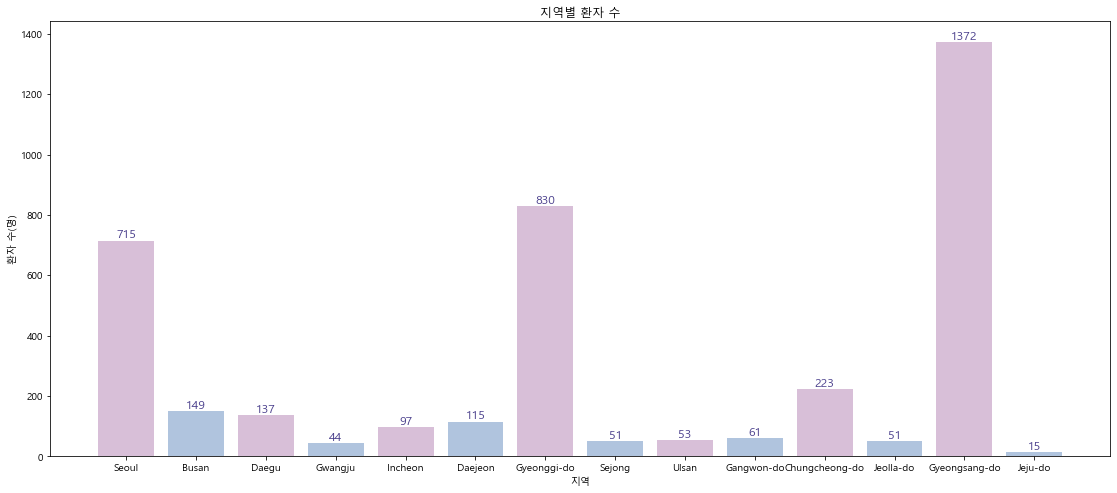

In [59]:
# 지역별 환자 수
patients_region = patients(*patients_regions)
print_plt(region, patients_region, '환자 수')

# 시각화
plt.figure(figsize = (19, 8))

plt.bar(region, patients_region, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(region):
    plt.text(v, patients_region[i], patients_region[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('지역')
plt.ylabel('환자 수(명)')
plt.title('지역별 환자 수')

plt.show()

Seoul 사망 환자 수 : 0
Busan 사망 환자 수 : 0
Daegu 사망 환자 수 : 20
Gwangju 사망 환자 수 : 0
Incheon 사망 환자 수 : 0
Daejeon 사망 환자 수 : 1
Gyeonggi-do 사망 환자 수 : 1
Sejong 사망 환자 수 : 0
Ulsan 사망 환자 수 : 1
Gangwon-do 사망 환자 수 : 3
Chungcheong-do 사망 환자 수 : 0
Jeolla-do 사망 환자 수 : 0
Gyeongsang-do 사망 환자 수 : 40
Jeju-do 사망 환자 수 : 0


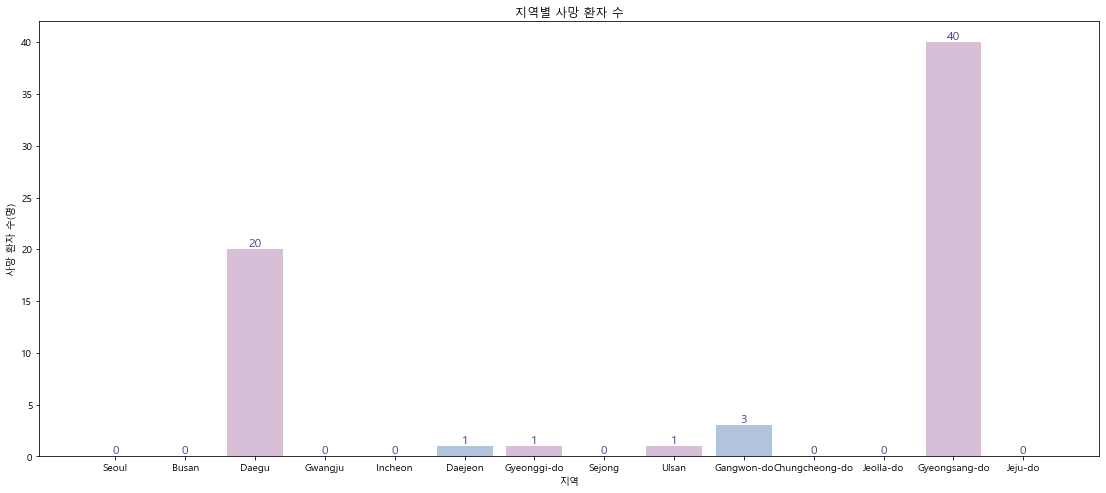

In [60]:
# 지역별 사망 환자 수
deceased_region = deceased(*patients_regions)
print_plt(region, deceased_region, '사망 환자 수')

# 시각화
plt.figure(figsize = (19, 8))

plt.bar(region, deceased_region, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(region):
    plt.text(v, deceased_region[i], deceased_region[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('지역')
plt.ylabel('사망 환자 수(명)')
plt.title('지역별 사망 환자 수')

plt.show()

Seoul 격리 해제 환자 수 : 54
Busan 격리 해제 환자 수 : 0
Daegu 격리 해제 환자 수 : 4
Gwangju 격리 해제 환자 수 : 26
Incheon 격리 해제 환자 수 : 91
Daejeon 격리 해제 환자 수 : 44
Gyeonggi-do 격리 해제 환자 수 : 61
Sejong 격리 해제 환자 수 : 46
Ulsan 격리 해제 환자 수 : 50
Gangwon-do 격리 해제 환자 수 : 26
Chungcheong-do 격리 해제 환자 수 : 200
Jeolla-do 격리 해제 환자 수 : 40
Gyeongsang-do 격리 해제 환자 수 : 920
Jeju-do 격리 해제 환자 수 : 15


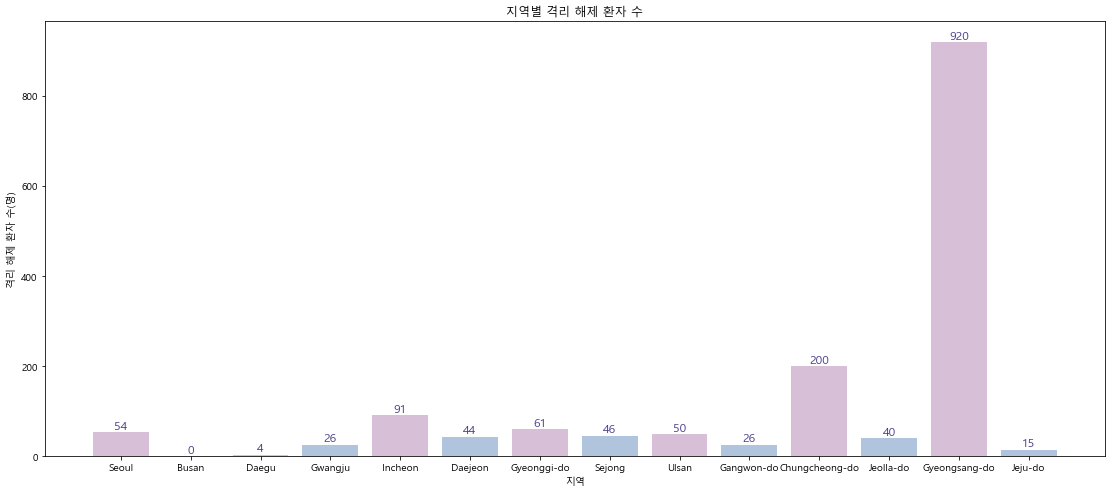

In [61]:
# 지역별 격리 해제 환자 수
released_region = released(*patients_regions)
print_plt(region, released_region, '격리 해제 환자 수')

# 시각화
plt.figure(figsize = (19, 8))

plt.bar(region, released_region, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(region):
    plt.text(v, released_region[i], released_region[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('지역')
plt.ylabel('격리 해제 환자 수(명)')
plt.title('지역별 격리 해제 환자 수')

plt.show()

Seoul 사망 비율 : 0.0
Busan 사망 비율 : 0.0
Daegu 사망 비율 : 0.145985401459854
Gwangju 사망 비율 : 0.0
Incheon 사망 비율 : 0.0
Daejeon 사망 비율 : 0.008695652173913044
Gyeonggi-do 사망 비율 : 0.0012048192771084338
Sejong 사망 비율 : 0.0
Ulsan 사망 비율 : 0.018867924528301886
Gangwon-do 사망 비율 : 0.04918032786885246
Chungcheong-do 사망 비율 : 0.0
Jeolla-do 사망 비율 : 0.0
Gyeongsang-do 사망 비율 : 0.029154518950437316
Jeju-do 사망 비율 : 0.0


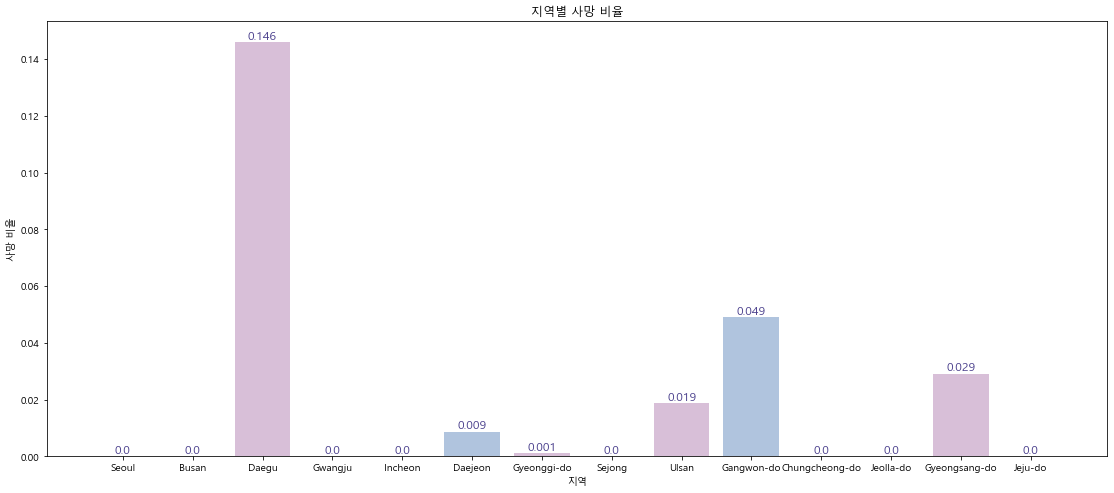

In [62]:
# 지역별 사망 비율
deceased_ratio_region = deceased_ratio(*patients_regions)
print_plt(region, deceased_ratio_region, '사망 비율')

# 시각화
plt.figure(figsize = (19, 8))

plt.bar(region, deceased_ratio_region, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(region):
    plt.text(v, deceased_ratio_region[i], round(deceased_ratio_region[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('지역')
plt.ylabel('사망 비율')
plt.title('지역별 사망 비율')

plt.show()

Seoul 격리 해제 비율 : 0.07552447552447553
Busan 격리 해제 비율 : 0.0
Daegu 격리 해제 비율 : 0.029197080291970802
Gwangju 격리 해제 비율 : 0.5909090909090909
Incheon 격리 해제 비율 : 0.9381443298969072
Daejeon 격리 해제 비율 : 0.3826086956521739
Gyeonggi-do 격리 해제 비율 : 0.07349397590361446
Sejong 격리 해제 비율 : 0.9019607843137255
Ulsan 격리 해제 비율 : 0.9433962264150944
Gangwon-do 격리 해제 비율 : 0.4262295081967213
Chungcheong-do 격리 해제 비율 : 0.8968609865470852
Jeolla-do 격리 해제 비율 : 0.7843137254901961
Gyeongsang-do 격리 해제 비율 : 0.6705539358600583
Jeju-do 격리 해제 비율 : 1.0


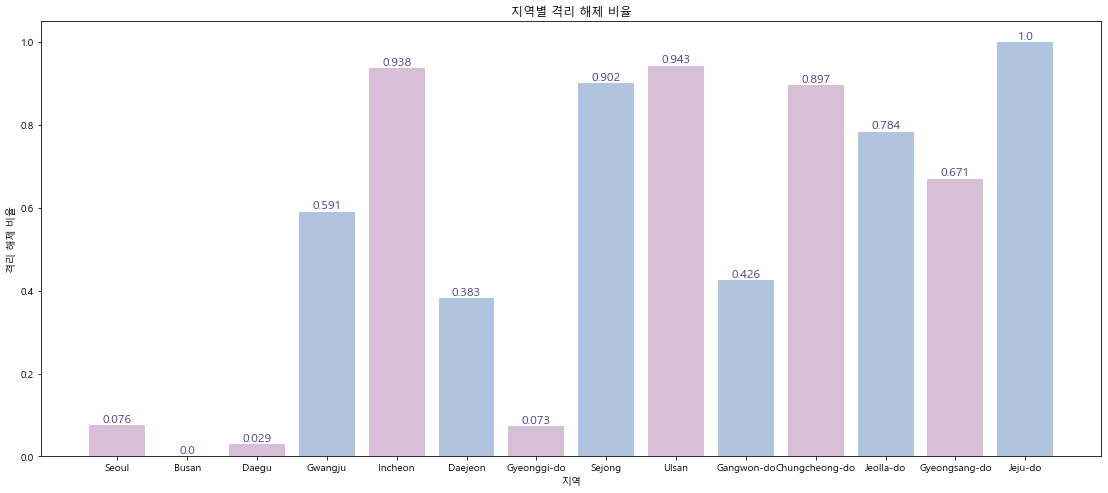

In [63]:
# 지역별 격리 해제 비율
released_ratio_region = released_ratio(*patients_regions)
print_plt(region, released_ratio_region, '격리 해제 비율')

# 시각화
plt.figure(figsize = (19, 8))

plt.bar(region, released_ratio_region, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(region):
    plt.text(v, released_ratio_region[i], round(released_ratio_region[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('지역')
plt.ylabel('격리 해제 비율')
plt.title('지역별 격리 해제 비율')

plt.show()

### 확진자 나이 관련

In [64]:
age_level = ['0~19', '20~39', '40~59', '60~79', '80~'] #단위: 세
patients_ages = [patients_1, patients_2, patients_3, patients_4, patients_5]

0~19 환자 수 : 240
20~39 환자 수 : 1561
40~59 환자 수 : 1182
60~79 환자 수 : 710
80~ 환자 수 : 220


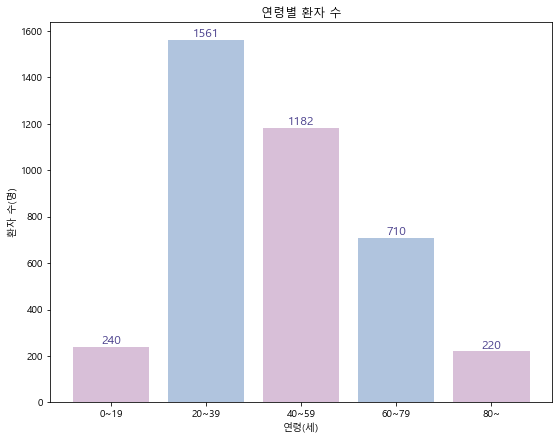

In [65]:
# 연령별 환자 수
patients_age = patients(*patients_ages)
print_plt(age_level, patients_age, '환자 수')

# 시각화
plt.figure(figsize = (9, 7))

plt.bar(age_level, patients_age, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(age_level):
    plt.text(v, patients_age[i], patients_age[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('환자 수(명)')
plt.title('연령별 환자 수')

plt.show()

0~19 사망 환자 수 : 0
20~39 사망 환자 수 : 1
40~59 사망 환자 수 : 7
60~79 사망 환자 수 : 30
80~ 사망 환자 수 : 28


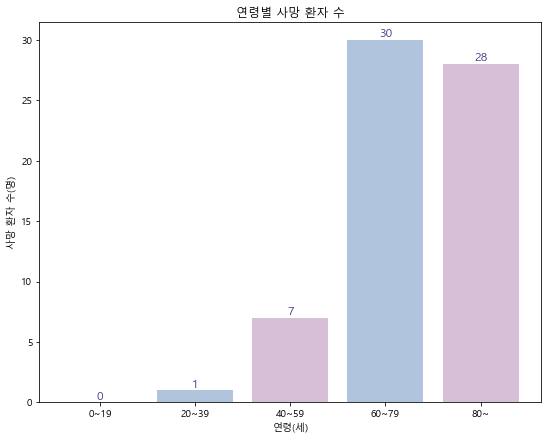

In [66]:
# 연령별 사망 환자 수
deceased_age = deceased(*patients_ages)
print_plt(age_level, deceased_age, '사망 환자 수')

# 시각화
plt.figure(figsize = (9, 7))

plt.bar(age_level, deceased_age, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(age_level):
    plt.text(v, deceased_age[i], deceased_age[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('사망 환자 수(명)')
plt.title('연령별 사망 환자 수')

plt.show()

0~19 격리 해제 환자 수 : 84
20~39 격리 해제 환자 수 : 621
40~59 격리 해제 환자 수 : 541
60~79 격리 해제 환자 수 : 256
80~ 격리 해제 환자 수 : 75


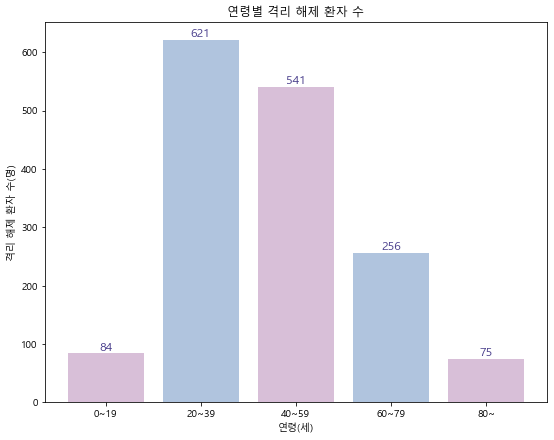

In [67]:
# 연령별 격리 해제 환자 수
released_age = released(*patients_ages)
print_plt(age_level, released_age, '격리 해제 환자 수')

# 시각화
plt.figure(figsize = (9, 7))

plt.bar(age_level, released_age, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(age_level):
    plt.text(v, released_age[i], released_age[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('격리 해제 환자 수(명)')
plt.title('연령별 격리 해제 환자 수')

plt.show()

0~19 사망 비율 : 0.0
20~39 사망 비율 : 0.0006406149903907751
40~59 사망 비율 : 0.005922165820642978
60~79 사망 비율 : 0.04225352112676056
80~ 사망 비율 : 0.12727272727272726


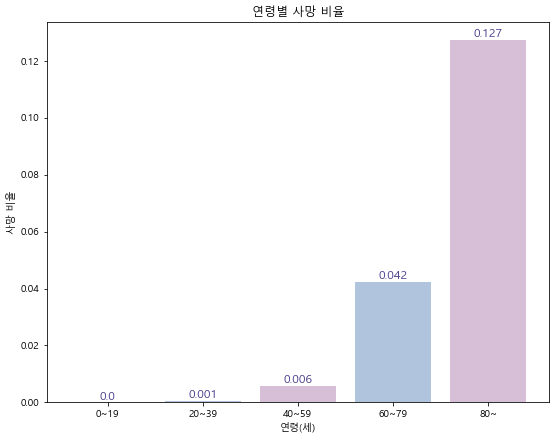

In [68]:
# 연령별 사망 비율
deceased_ratio_age = deceased_ratio(*patients_ages)
print_plt(age_level, deceased_ratio_age, '사망 비율')

# 시각화
plt.figure(figsize = (9, 7))

plt.bar(age_level, deceased_ratio_age, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(age_level):
    plt.text(v, deceased_ratio_age[i], round(deceased_ratio_age[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('사망 비율')
plt.title('연령별 사망 비율')

plt.show()

0~19 격리 해제 비율 : 0.35
20~39 격리 해제 비율 : 0.39782190903267134
40~59 격리 해제 비율 : 0.4576988155668359
60~79 격리 해제 비율 : 0.36056338028169016
80~ 격리 해제 비율 : 0.3409090909090909


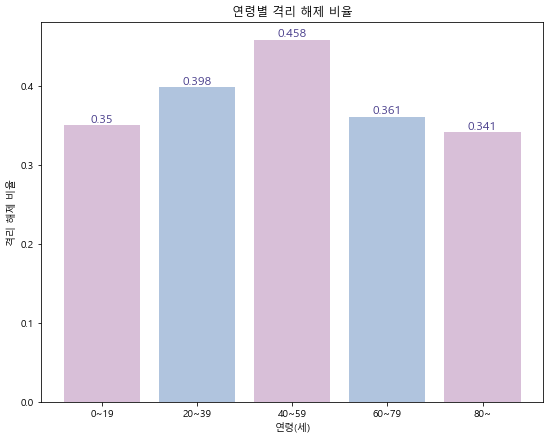

In [69]:
# 연령별 격리 해제 비율
released_ratio_age = released_ratio(*patients_ages)
print_plt(age_level, released_ratio_age, '격리 해제 비율')

# 시각화
plt.figure(figsize = (9, 7))

plt.bar(age_level, released_ratio_age, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(age_level):
    plt.text(v, released_ratio_age[i], round(released_ratio_age[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('격리 해제 비율')
plt.title('연령별 격리 해제 비율')

plt.show()

### 나이 - 성별 관련

In [70]:
f_a = [pa[pa['sex'] == 'female']['patient_id'].count() for pa in patients_ages]
m_a = [pa[pa['sex'] == 'male']['patient_id'].count() for pa in patients_ages]
print(f_a, m_a)

[94, 700, 709, 413, 148] [146, 729, 472, 297, 72]


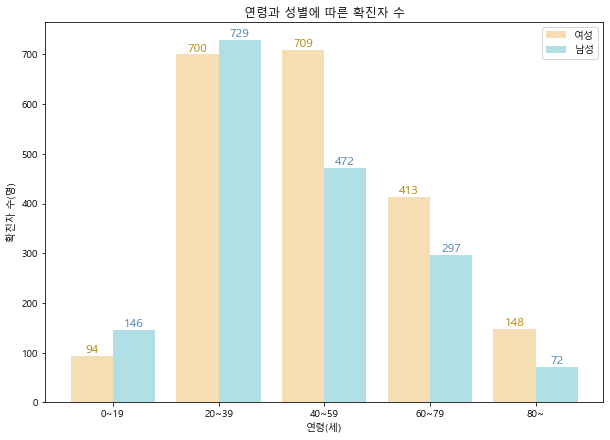

In [71]:
plt.figure(figsize = (10, 7))

x_axis = np.arange(len(age_level))
plt.xticks(x_axis, age_level)

plt.bar(x_axis-0.2, f_a, width=0.4, label = '여성', color='wheat')
plt.bar(x_axis+0.2, m_a, width=0.4, label = '남성', color='powderblue')

for i, v in enumerate(x_axis):
    plt.text(v-0.2, f_a[i], f_a[i],
             fontsize = 12, 
             color='darkgoldenrod',
             horizontalalignment='center',
             verticalalignment='bottom')
    plt.text(v+0.2, m_a[i], m_a[i],
             fontsize = 12, 
             color='steelblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('확진자 수(명)')
plt.title('연령과 성별에 따른 확진자 수')

plt.legend()
plt.show()

In [72]:
f_r = [pr[pr['sex'] == 'female']['patient_id'].count() for pr in patients_regions]
m_r = [pr[pr['sex'] == 'male']['patient_id'].count() for pr in patients_regions]
print(f_r, m_r)

[312, 70, 73, 25, 52, 63, 431, 22, 24, 28, 140, 18, 795, 11] [272, 79, 64, 19, 45, 52, 399, 28, 29, 33, 83, 33, 576, 4]


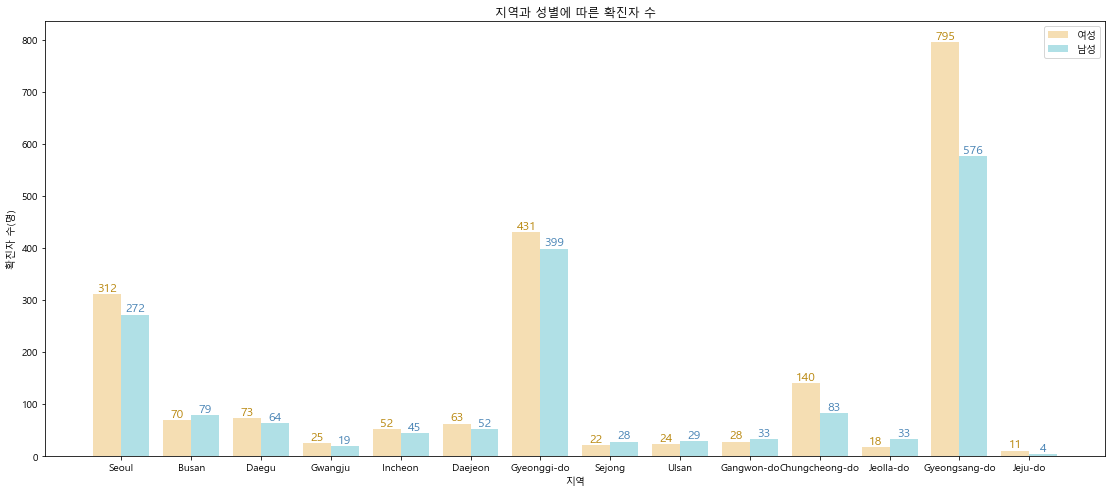

In [73]:
plt.figure(figsize = (19, 8))

x_axis = np.arange(len(region))
plt.xticks(x_axis, region)

plt.bar(x_axis-0.2, f_r, width=0.4, label = '여성', color='wheat')
plt.bar(x_axis+0.2, m_r, width=0.4, label = '남성', color='powderblue')

for i, v in enumerate(x_axis):
    plt.text(v-0.2, f_r[i], f_r[i],
             fontsize = 12, 
             color='darkgoldenrod',
             horizontalalignment='center',
             verticalalignment='bottom')
    plt.text(v+0.2, m_r[i], m_r[i],
             fontsize = 12, 
             color='steelblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('지역')
plt.ylabel('확진자 수(명)')
plt.title('지역과 성별에 따른 확진자 수')

plt.legend()
plt.show()

### 지역 - 나이 관련

In [74]:
al_r = [[pr[pr['age_level'] == i]['patient_id'].count() for pr in patients_regions] for i in range(1, len(age_level)+1)]
print(al_r)

[[35, 19, 12, 3, 2, 7, 45, 3, 2, 1, 25, 3, 81, 2], [401, 68, 38, 22, 41, 27, 352, 10, 27, 23, 68, 23, 450, 11], [197, 32, 42, 6, 36, 39, 253, 37, 18, 19, 90, 11, 400, 2], [70, 26, 34, 12, 17, 38, 143, 1, 6, 15, 35, 13, 300, 0], [12, 4, 11, 1, 1, 4, 37, 0, 0, 3, 5, 1, 141, 0]]


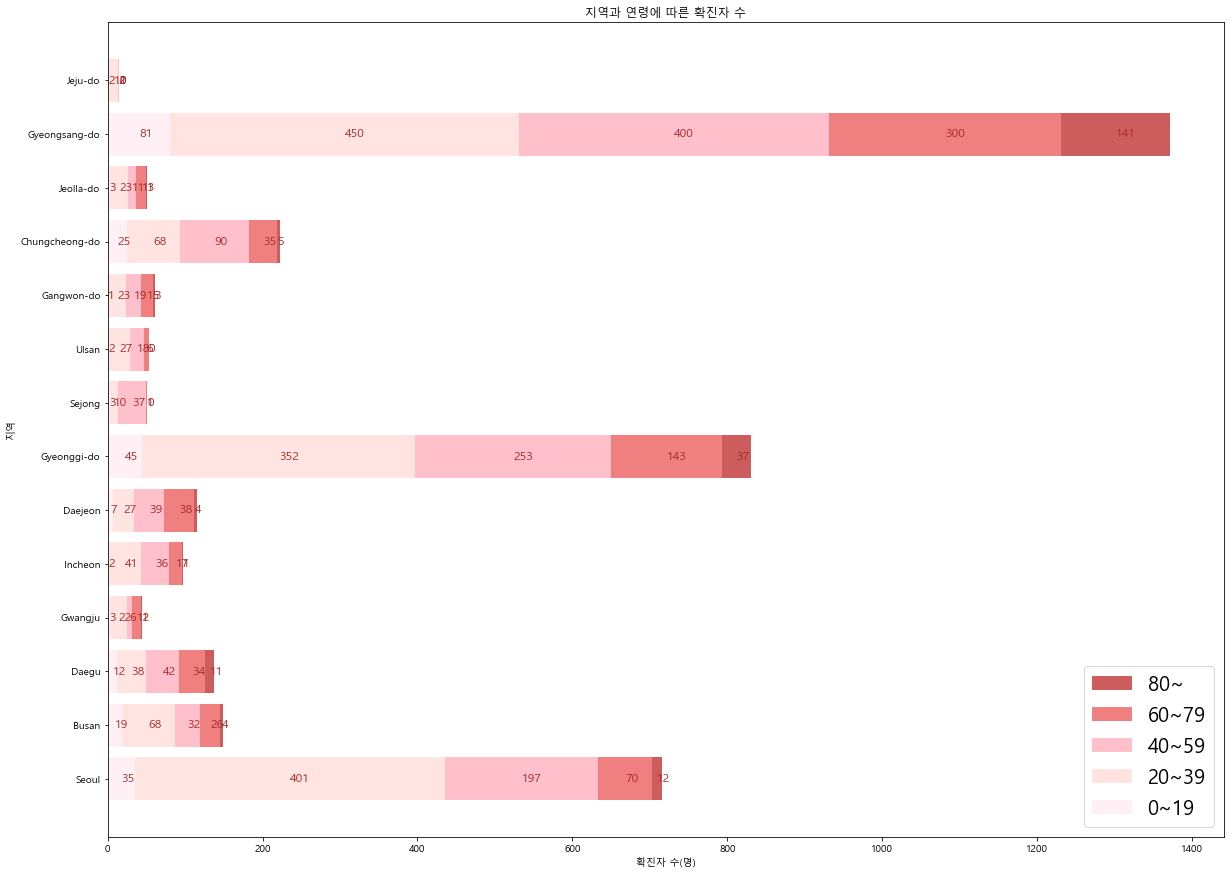

In [75]:
plt.figure(figsize = (20, 15))

plt.barh(region, al_r[4], left=np.sum(al_r[:4], axis=0), label=age_level[4], color='indianred')
plt.barh(region, al_r[3], left=np.sum(al_r[:3], axis=0), label=age_level[3], color='lightcoral')
plt.barh(region, al_r[2], left=np.sum(al_r[:2], axis=0), label=age_level[2], color='pink')
plt.barh(region, al_r[1], left=np.sum(al_r[:1], axis=0), label=age_level[1], color='mistyrose')
plt.barh(region, al_r[0], label=age_level[0], color='lavenderblush')


n = np.array([np.sum(al_r[:j], axis=0) for j in range(1, len(al_r)+1)])

for k in range(len(n)):
    for i, v in enumerate(n[k]):
        plt.text(v-al_r[k][i]/2, i, al_r[k][i],
                 fontsize = 12, 
                 color='brown',
                 horizontalalignment='left',
                 verticalalignment='center')

plt.xlabel('확진자 수(명)')
plt.ylabel('지역')
plt.title('지역과 연령에 따른 확진자 수')
    
plt.legend(fontsize=20)
plt.show()

### 결론
- 코로나 확진자들 중 연령이 60대 이상인 확진자는 사망비율이 높다.
- 지역별로 노인 비율이 다르기 때문에 지역마다 확진자 연령 비율이 다르다.


## 2.날씨-확진자분석

### 전국
- 확진자 수 - 기온
- 확진자 수 - 습도

### 지역별
- 확진자 수 - 기온
- 확진자 수 - 습도

사용 함수

In [76]:
# province별 평균 날씨 데이터
def avg_province(province):
    province = weather.loc[weather['province']==province]
    province = province.groupby(['date'])[["avg_temp","precipitation", "max_wind_speed", "avg_relative_humidity"]].mean()
    return province

# main 데이터 + 확진자 데이터 merge 함수
def merge_(main_data,target):
    return pd.merge(main_data,target,on='date')

# 전체 확진자 데이터 + weather 그래프 함수
def grp(data,target): # data = 조사 대상 데이터, target = 비교 대상
    fig, ax1 = plt.subplots()
    fig.autofmt_xdate(rotation=90)
    ax1.plot(data['date'],data['patient'], label = 'patient')
    ax1.set_title('날짜별 확진자 수와 %s 비교'%(target))
    ax1.set_ylabel('patient')
    ax1.legend(loc=1)

    ax2 = ax1.twinx()
    ax2.plot(data['date'],data[target], 'g--', label = target)
    ax2.set_ylabel(target, rotation = 270)
    ax2.legend(loc=2)
    return plt.show()

# 월별
def month_(data, month):
    c = data['month'] == month
    return data.loc[c]

# 같은 y축을 가진 plot 함수 
def plot_(data,target):
    plt.figure(figsize = (20, 15))
    plt.title('%s 와 확진자 수 그래프'%(target),fontsize=20)
    plt.plot(data['date'],data[target], label = target)
    plt.plot(data['date'],data['patient'], label = 'patient')
    plt.legend(fontsize=20)
    return plt.show()

# 원하는 월 선택 기능 추가
def grp_month(data,month,target): # data = 조사 대상 데이터, target = 비교 대상
    fig, ax1 = plt.subplots()
    fig.autofmt_xdate(rotation=90)
    ax1.plot(data['date'],data['patient'], label = 'patient')
    ax1.set_title('%s월 날짜별 확진자 수와 %s 검색 비교'%(month,target))
    ax1.set_ylabel('patient')
    ax1.legend(loc=1)
    ax2 = ax1.twinx()
    ax2.plot(data['date'],data[target], 'g--', label = target)
    ax2.set_ylabel(target, rotation = 270)
    ax2.legend(loc=2)
    return plt.show()

# 산점도 함수
def lmp(data_,target):
    sns.lmplot(data = data_, x = "patient", y = target, fit_reg=True)
    return 

In [77]:
weather

,province,avg_temp,precipitation,max_wind_speed,avg_relative_humidity,date,year,month,day
23679,Seoul,0.7,0.0,5.7,46.8,2020-01-20,2020,1,20
23680,Busan,5.1,0.0,6.1,45.6,2020-01-20,2020,1,20
23681,Daegu,4.6,0.0,6.4,44.1,2020-01-20,2020,1,20
23682,Gwangju,4.0,0.0,3.3,63.1,2020-01-20,2020,1,20
23683,Incheon,1.2,0.0,8.6,56.0,2020-01-20,2020,1,20
...,...,...,...,...,...,...,...,...,...
26266,Jeolla-do,22.0,27.6,4.4,85.1,2020-06-29,2020,6,29
26267,Jeolla-do,21.9,80.5,16.8,97.9,2020-06-29,2020,6,29
26268,Gyeongsang-do,20.4,43.9,4.5,90.9,2020-06-29,2020,6,29
26269,Gyeongsang-do,21.9,98.9,5.8,85.0,2020-06-29,2020,6,29


In [78]:
# 전국 평균
avg_korea = weather.groupby(['date'])[["avg_temp","precipitation", "max_wind_speed", "avg_relative_humidity"]].mean()
avg_korea = avg_korea.reset_index()
avg_korea['month'] = avg_korea['date'].dt.month
avg_korea

,date,avg_temp,precipitation,max_wind_speed,avg_relative_humidity,month
0,2020-01-20,3.47500,0.00000,6.03125,53.27500,1
1,2020-01-21,1.89375,0.00000,4.26875,47.96250,1
2,2020-01-22,4.48125,0.00000,3.88750,67.63750,1
3,2020-01-23,6.31250,0.00000,4.25625,77.18125,1
4,2020-01-24,5.62500,0.00000,4.15000,70.70000,1
...,...,...,...,...,...,...
157,2020-06-25,21.74375,7.47500,4.25625,92.71875,6
158,2020-06-26,23.13125,0.41250,5.18125,77.18125,6
159,2020-06-27,24.14375,0.01250,3.72500,74.51250,6
160,2020-06-28,24.19375,0.01250,4.70625,75.76875,6


In [79]:
# 날씨 - 확진자 수 merge
c = ['patient_id']
patient_info_all = patient_info.groupby('date')[c].count()
patient_info_all['patient'] = patient_info_all['patient_id']
patient_info_all = patient_info_all.drop(columns=c)
patient_info_all = patient_info_all.reset_index()
weather_patient = merge_(avg_korea,patient_info_all)
weather_patient

,date,avg_temp,precipitation,max_wind_speed,avg_relative_humidity,month,patient
0,2020-01-20,3.47500,0.00000,6.03125,53.27500,1,1
1,2020-01-23,6.31250,0.00000,4.25625,77.18125,1,1
2,2020-01-26,7.05000,0.00000,6.06250,69.38750,1,1
3,2020-01-27,6.43750,0.00000,7.31875,77.30000,1,1
4,2020-01-30,5.38125,0.00000,4.64375,67.10625,1,4
...,...,...,...,...,...,...,...
140,2020-06-25,21.74375,7.47500,4.25625,92.71875,6,9
141,2020-06-26,23.13125,0.41250,5.18125,77.18125,6,4
142,2020-06-27,24.14375,0.01250,3.72500,74.51250,6,17
143,2020-06-28,24.19375,0.01250,4.70625,75.76875,6,13


<function matplotlib.pyplot.show(close=None, block=None)>

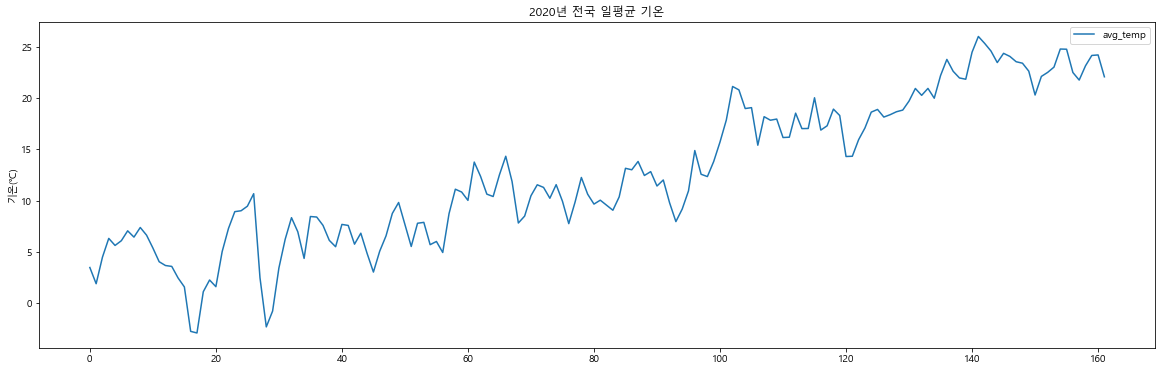

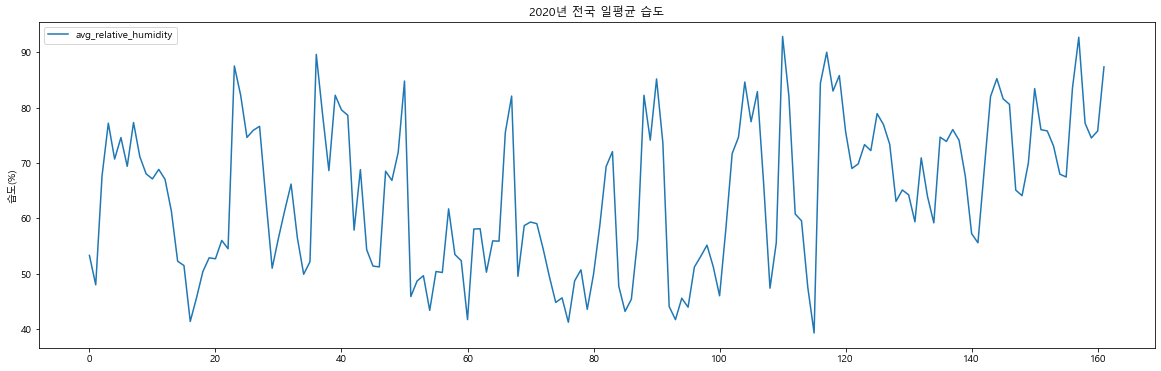

In [80]:
avg_korea[['avg_temp']].plot(figsize=(20,6))
plt.title("2020년 전국 일평균 기온")
plt.ylabel("기온(℃)")
plt.show
avg_korea[['avg_relative_humidity']].plot(figsize=(20,6))
plt.title("2020년 전국 일평균 습도")
plt.ylabel("습도(%)")
plt.show

### 확진자-날씨 데이터 시각화

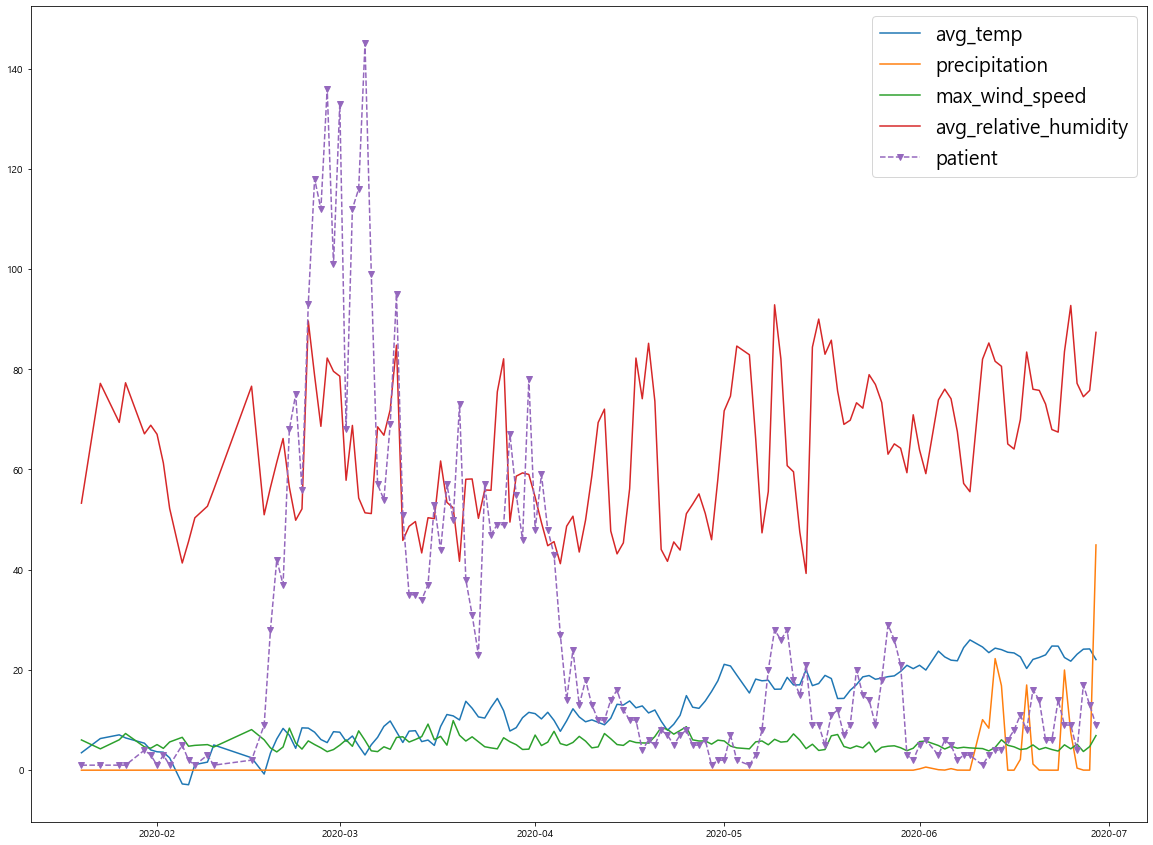

In [81]:
plt.figure(figsize = (20, 15))

plt.plot(weather_patient["date"],weather_patient["avg_temp"], label = 'avg_temp')
plt.plot(weather_patient["date"],weather_patient["precipitation"], label = 'precipitation')
plt.plot(weather_patient["date"],weather_patient["max_wind_speed"], label = 'max_wind_speed')
plt.plot(weather_patient["date"],weather_patient["avg_relative_humidity"], label = 'avg_relative_humidity')
plt.plot(weather_patient["date"],weather_patient["patient"], label = 'patient',linestyle = '--', marker = 'v')
plt.legend(fontsize=20)
plt.show()

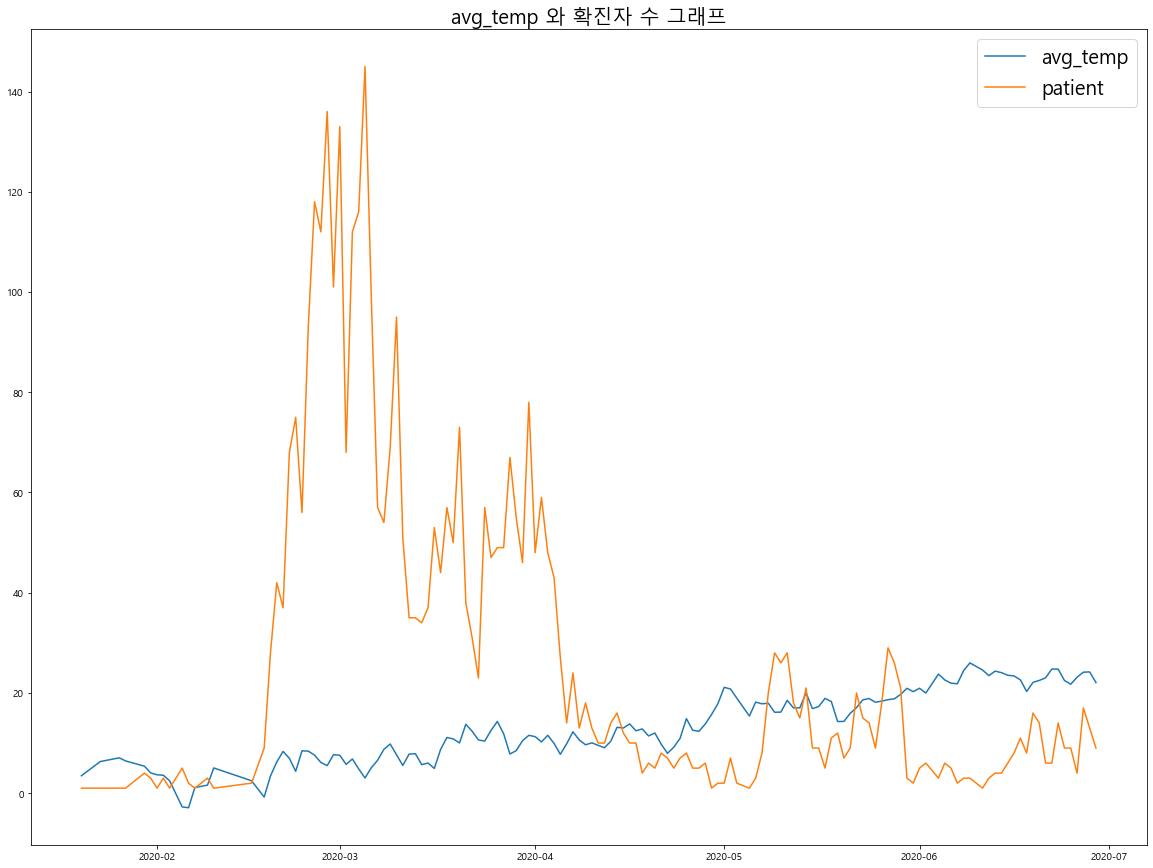

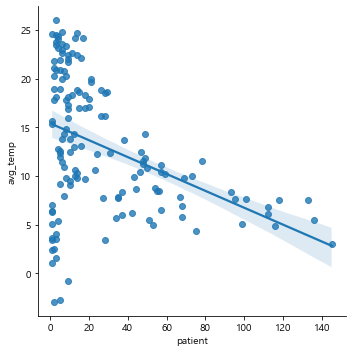

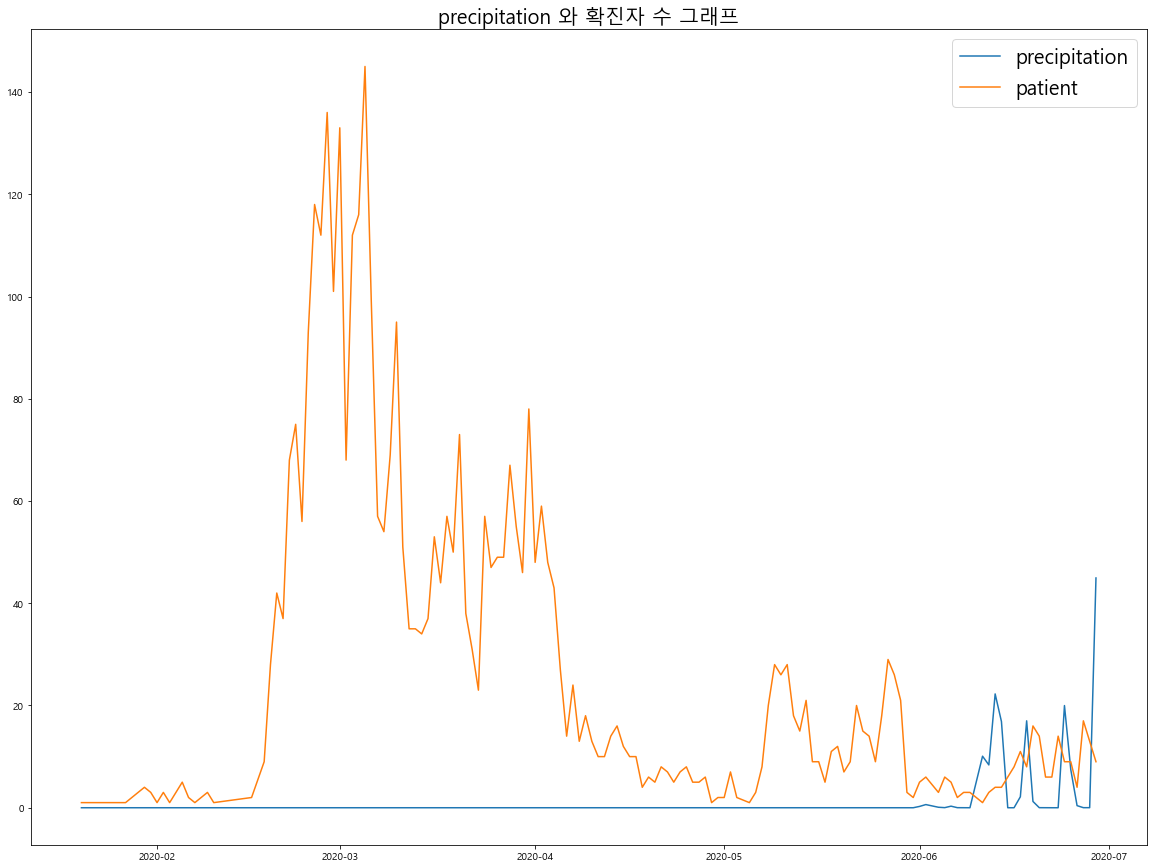

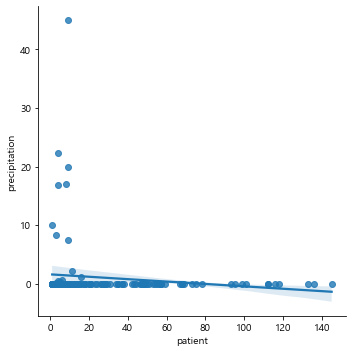

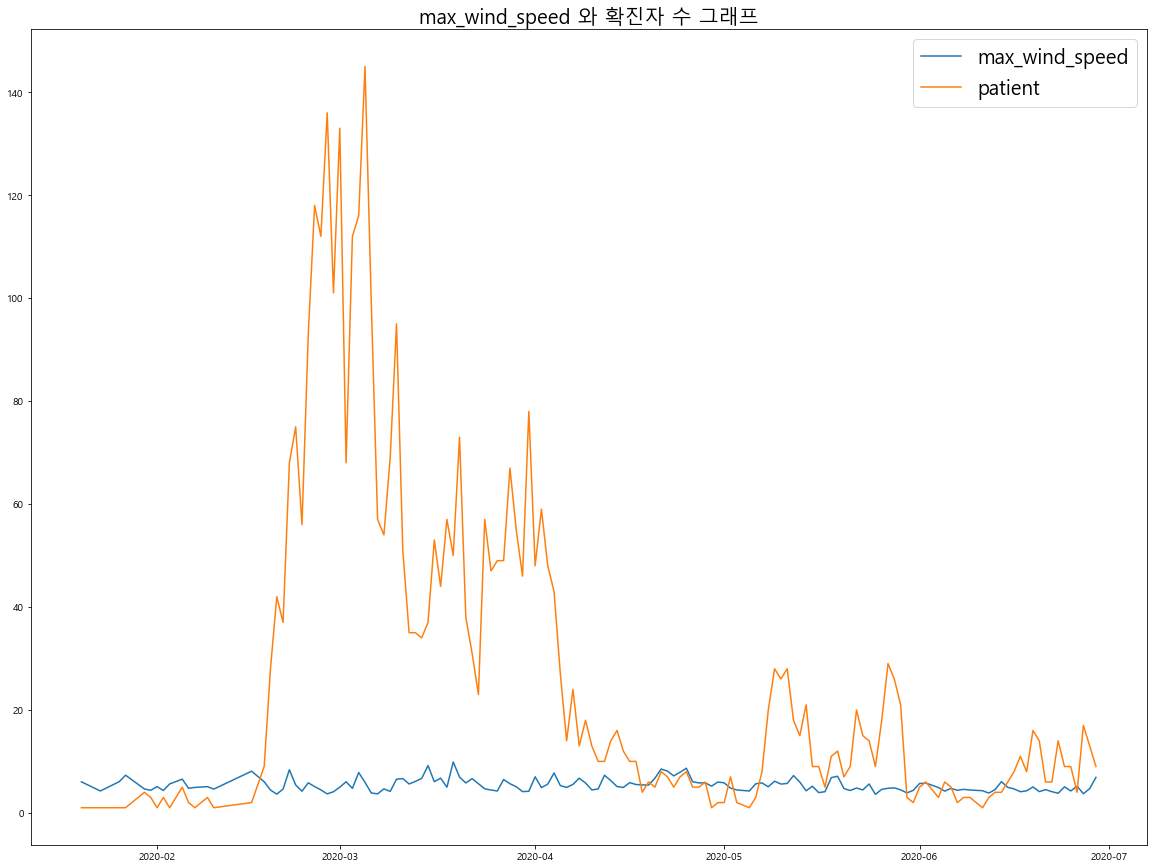

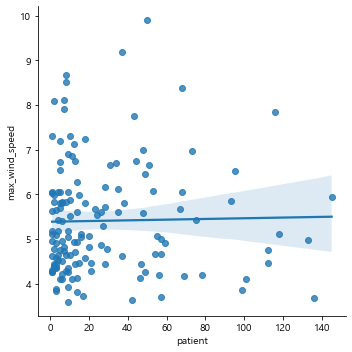

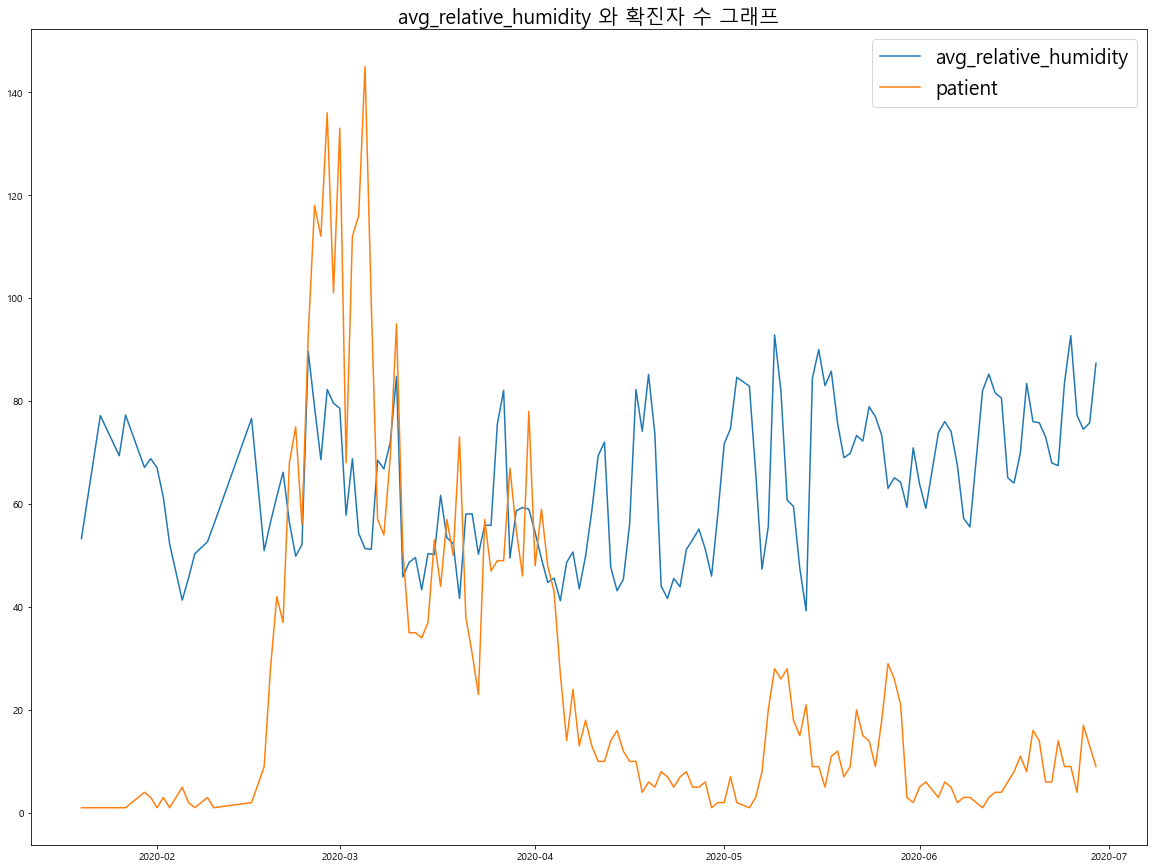

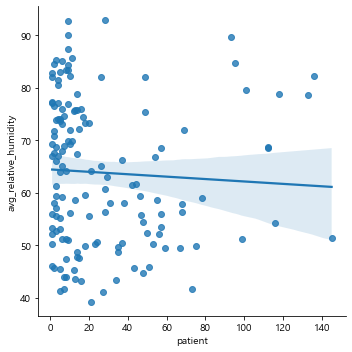

In [82]:
for i in ["avg_temp","precipitation", "max_wind_speed", "avg_relative_humidity"]: 
    plot_(weather_patient,i)
    lmp(weather_patient,i)

In [83]:
avg_korea2=weather.groupby(['year',"month"])[["avg_temp","precipitation", "max_wind_speed", "avg_relative_humidity"]].mean()
avg_korea2

avg_temp  precipitation  max_wind_speed  avg_relative_humidity
year month                                                                 
2020 1       5.398438        0.00000        4.793229              67.757292
     2       4.598922        0.00000        5.151940              63.375647
     3       8.664040        0.00000        5.757374              58.447677
     4      11.524375        0.00000        6.151875              54.192917
     5      18.048790        0.00000        5.097984              70.884073
     6      23.107328        5.61875        4.704957              73.591164

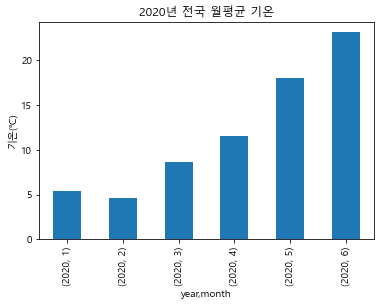

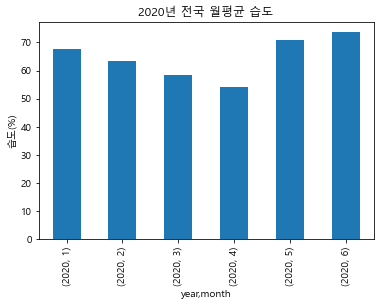

In [84]:
avg_korea2["avg_temp"].plot(kind = 'bar')
plt.title('2020년 전국 월평균 기온')
plt.ylabel("기온(℃)")
plt.show()
avg_korea2["avg_relative_humidity"].plot(kind = 'bar')
plt.title('2020년 전국 월평균 습도')
plt.ylabel("습도(%)")
plt.show()

### 월별 날씨 - 확진자 수

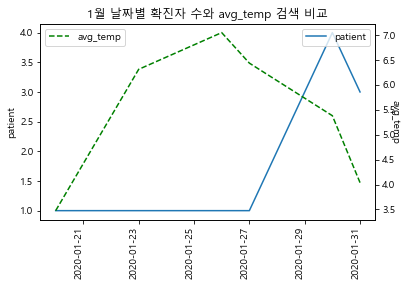

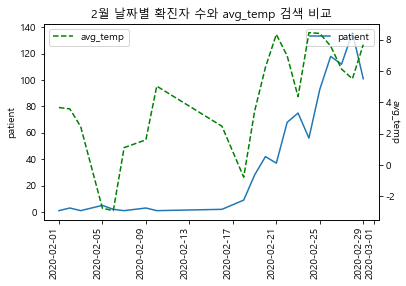

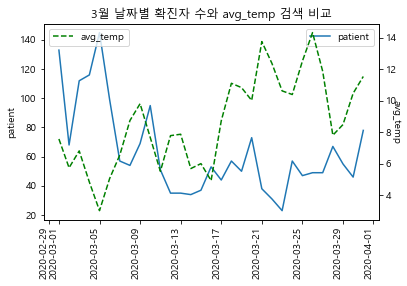

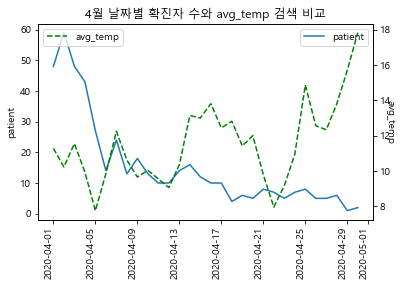

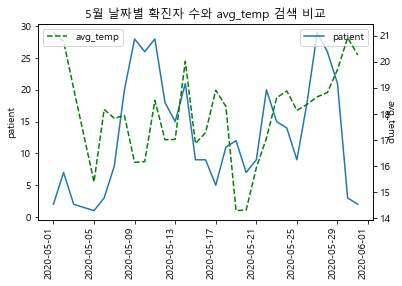

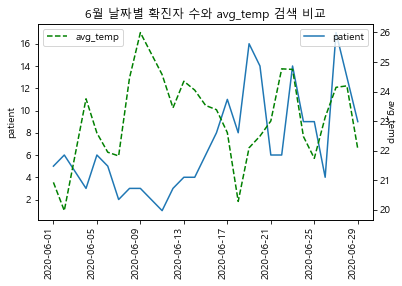

In [85]:
for i in range(6):
    i+=1
    a = month_(weather_patient,i)
    grp_month(a,i,'avg_temp')

### 결론
- 평균 기온이 낮아질수록 확진자 수가 증가함을 알 수 있다.

## 3.검색빈도-확진자분석

(비율 조정 => 두개의 y축 사용)

### 전체
#### 검색 비율 조정 x
- 확진자 수 - 전체 검색 트랜드 빈도
- 확진자 수 - 개별 검색 트랜드 빈도 \
=> cold, coronavirus와 확진자 수 간의 상관관계가 있다고 판단, 이후 분석은 cold, coronavirus 검색 데이터만 사용

#### 검색 비율 조정 o
- 확진자 수 - cold 검색 빈도
- 확진자 수 - coronavirus 검색 빈도

### 월별 
(cold, coronavirus 검색 - 확진자 수)
- 1월
- 2월
- 3월
- 4월
- 5월
- 6월

사용 함수

In [86]:
# 검색 데이터 + 확진자 데이터 merge 함수
def merge_(main_data,target):
    return pd.merge(main_data,target,on='date')

# 전체 확진자 데이터 + 검색 트랜드 데이터 그래프 함수
def grp(data,target): # data = 조사 대상 데이터, target = 비교 대상
    fig, ax1 = plt.subplots()
    fig.autofmt_xdate(rotation=90)
    ax1.plot(data['date'],data['patient'], label = 'patient')
    ax1.set_title('날짜별 확진자 수와 %s 검색 비교'%(target))
    ax1.set_ylabel('patient')
    ax1.legend(loc=1)

    ax2 = ax1.twinx()
    ax2.plot(data['date'],data[target], 'g--', label = target)
    ax2.set_ylabel(target, rotation = 270)
    ax2.legend(loc=2)
    return plt.show()

# 원하는 월 선택 기능 추가
def grp_month(data,month,target): # data = 조사 대상 데이터, target = 비교 대상
    fig, ax1 = plt.subplots()
    fig.autofmt_xdate(rotation=90)
    ax1.plot(data['date'],data['patient'], label = 'patient')
    ax1.set_title('%s월 날짜별 확진자 수와 %s 검색 비교'%(month,target))
    ax1.set_ylabel('patient')
    ax1.legend(loc=1)

    ax2 = ax1.twinx()
    ax2.plot(data['date'],data[target], 'g--', label = target)
    ax2.set_ylabel(target, rotation = 270)
    ax2.legend(loc=2)
    return plt.show()

# 월별 검색 트랜드와 확진자 수 함수
def month_(month):
    c = search_patient['month'] == month
    return search_patient.loc[c]

# 산점도 함수
def lmp(data_,target):
    sns.lmplot(data = data_, x = "patient", y = target, fit_reg=True)
    return 

# 같은 y축을 가진 plot 함수 
def plot_(data,target):
    plt.figure(figsize = (20, 15))
    plt.title('%s 와 확진자 수 그래프'%(target),fontsize=20)
    plt.plot(data['date'],data[target], label = target)
    plt.plot(data['date'],data['patient'], label = 'patient')
    plt.legend(fontsize=20)
    return plt.show()

In [87]:
patient_info

,patient_id,sex,age,age_level,country,province,city,infection_case,released_date,deceased_date,state,date,year,month,day
0,1000000001,male,50s,3,Korea,Seoul,Gangseo-gu,overseas inflow,2020-02-05,NaN,released,2020-01-23,2020,1,23
1,1000000002,male,30s,2,Korea,Seoul,Jungnang-gu,overseas inflow,2020-03-02,NaN,released,2020-01-30,2020,1,30
2,1000000003,male,50s,3,Korea,Seoul,Jongno-gu,contact with patient,2020-02-19,NaN,released,2020-01-30,2020,1,30
3,1000000004,male,20s,2,Korea,Seoul,Mapo-gu,overseas inflow,2020-02-15,NaN,released,2020-01-30,2020,1,30
4,1000000005,female,20s,2,Korea,Seoul,Seongbuk-gu,contact with patient,2020-02-24,NaN,released,2020-01-31,2020,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,7000000011,male,30s,2,Korea,Jeju-do,Jeju-do,contact with patient,2020-05-19,NaN,released,2020-04-03,2020,4,3
5157,7000000012,female,20s,2,Korea,Jeju-do,Jeju-do,overseas inflow,2020-05-05,NaN,released,2020-04-03,2020,4,3
5158,7000000013,female,10s,1,China,Jeju-do,Jeju-do,overseas inflow,2020-04-26,NaN,released,2020-04-14,2020,4,14
5159,7000000014,female,30s,2,Korea,Jeju-do,Jeju-do,Itaewon Clubs,2020-06-12,NaN,released,2020-05-09,2020,5,9


In [88]:
# 검색어 - 확진자 수 merge
c = ['patient_id']
patient_info_all = patient_info.groupby('date')[c].count()
patient_info_all['patient'] = patient_info_all['patient_id']
patient_info_all = patient_info_all.drop(columns=c)
patient_info_all = patient_info_all.reset_index()
search_patient = merge_(search,patient_info_all)
search_patient

,cold,flu,pneumonia,coronavirus,date,year,month,day,patient
0,0.19217,0.70343,3.63716,20.69610,2020-01-20,2020,1,20,1
1,0.30308,0.55625,3.18035,100.00000,2020-01-23,2020,1,23,1
2,0.96569,0.40126,3.43989,39.62772,2020-01-26,2020,1,26,1
3,1.39513,0.50253,4.38777,57.07446,2020-01-27,2020,1,27,1
4,0.98978,0.44953,2.17811,45.93889,2020-01-30,2020,1,30,4
...,...,...,...,...,...,...,...,...,...
140,0.12072,0.04190,0.11936,2.16993,2020-06-25,2020,6,25,9
141,0.11381,0.03027,0.11317,2.15139,2020-06-26,2020,6,26,4
142,0.10554,0.02136,0.08354,1.96848,2020-06-27,2020,6,27,17
143,0.12563,0.02872,0.08072,2.19720,2020-06-28,2020,6,28,13


### 전체 확진자 수 - 검색

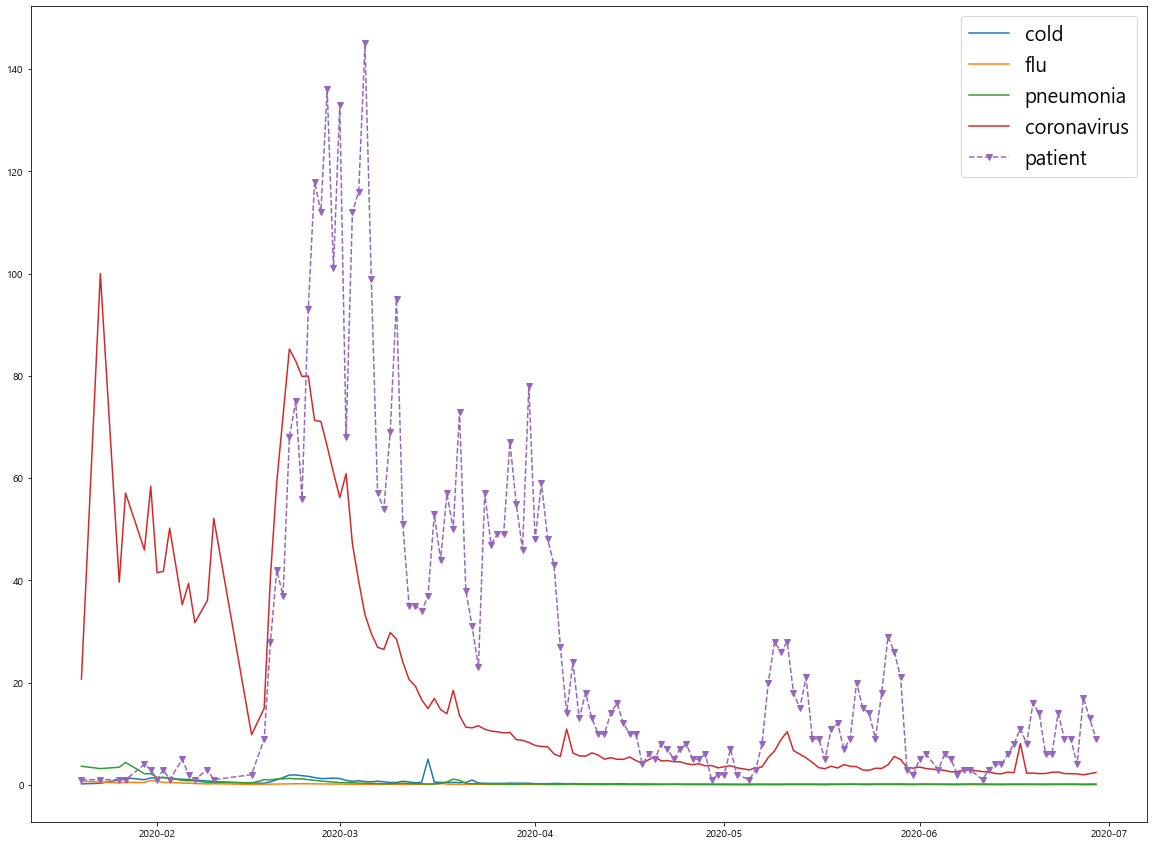

In [89]:
plt.figure(figsize = (20, 15))

plt.plot(search_patient["date"],search_patient["cold"], label = 'cold')
plt.plot(search_patient["date"],search_patient["flu"], label = 'flu')
plt.plot(search_patient["date"],search_patient["pneumonia"], label = 'pneumonia')
plt.plot(search_patient["date"],search_patient["coronavirus"], label = 'coronavirus')
plt.plot(search_patient["date"],search_patient["patient"], label = 'patient',linestyle = '--', marker = 'v')
plt.legend(fontsize=20)
plt.show()

2020년 1월 23일 coronavirus라는 검색어가 차지하는 비율이 100%라 이상치 처리하려 했으나 당시 뉴스를 보면 그럴만한 이유가 있었다고 판단함. \
https://www.yna.co.kr/view/AKR20200122196951083

전체적 보면 변화가 잘 보이지 않기 때문에 확진자 수와 개별 검색어를 비교 

### 개별 검색 트랜드 - 확진자 수

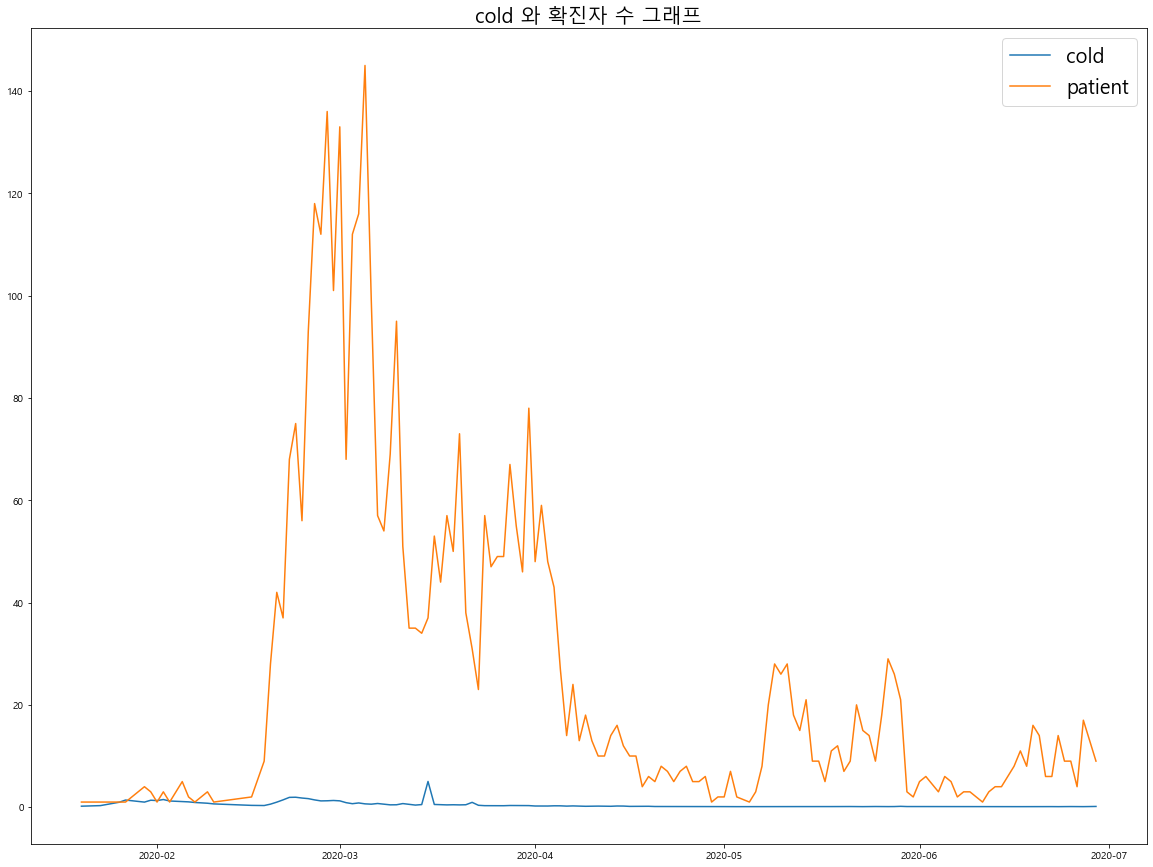

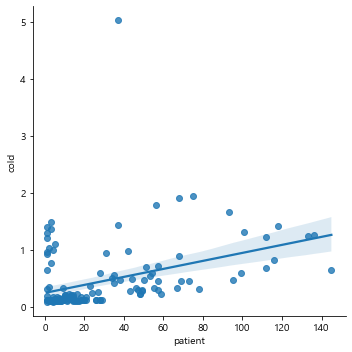

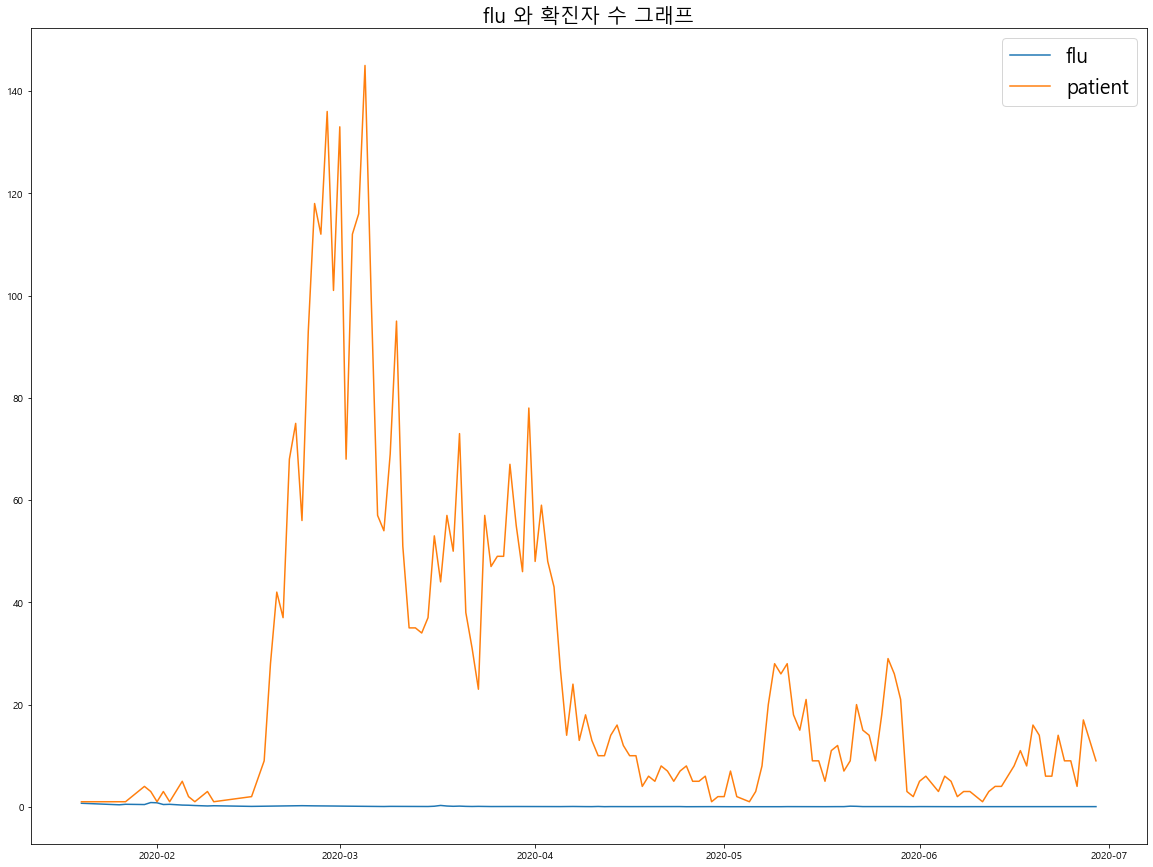

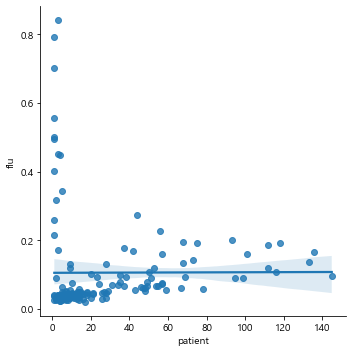

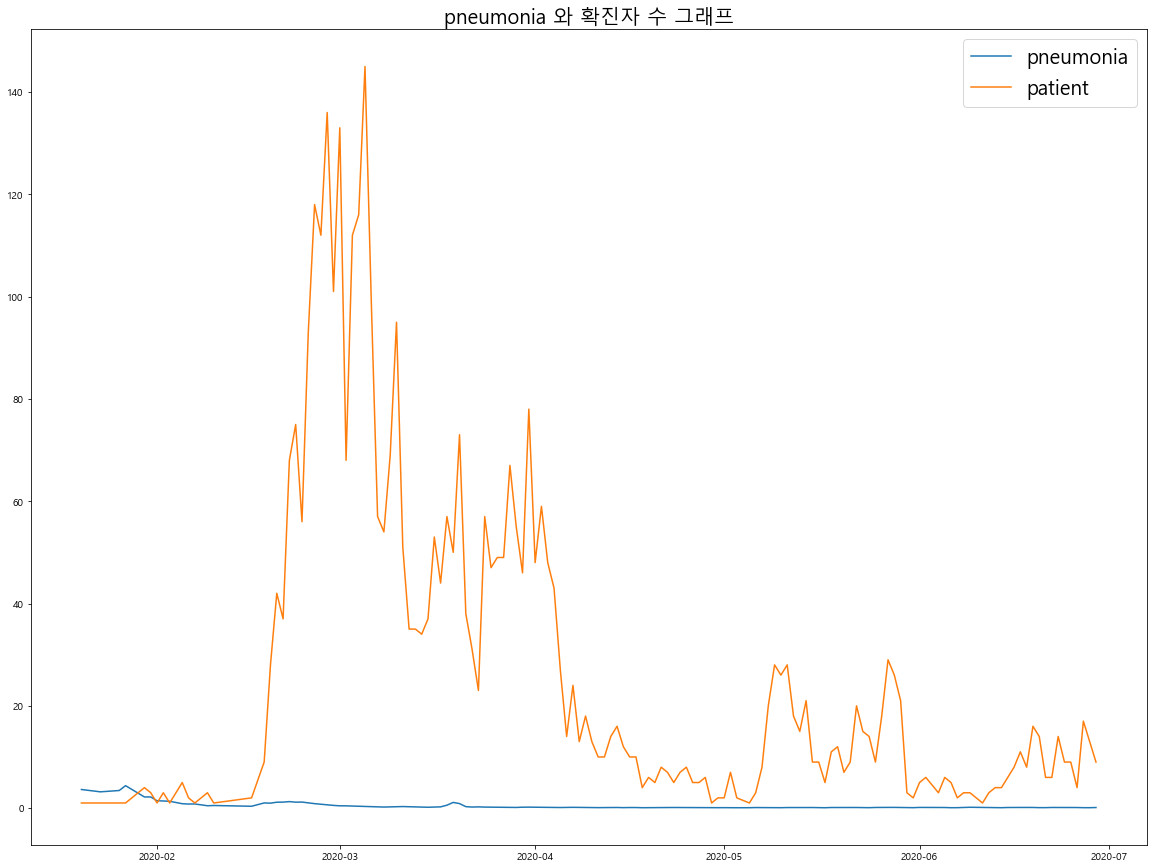

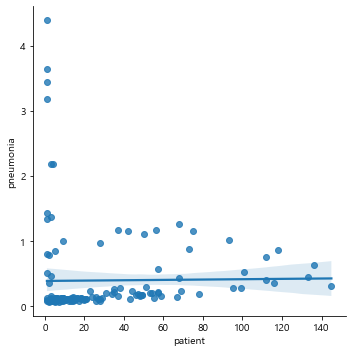

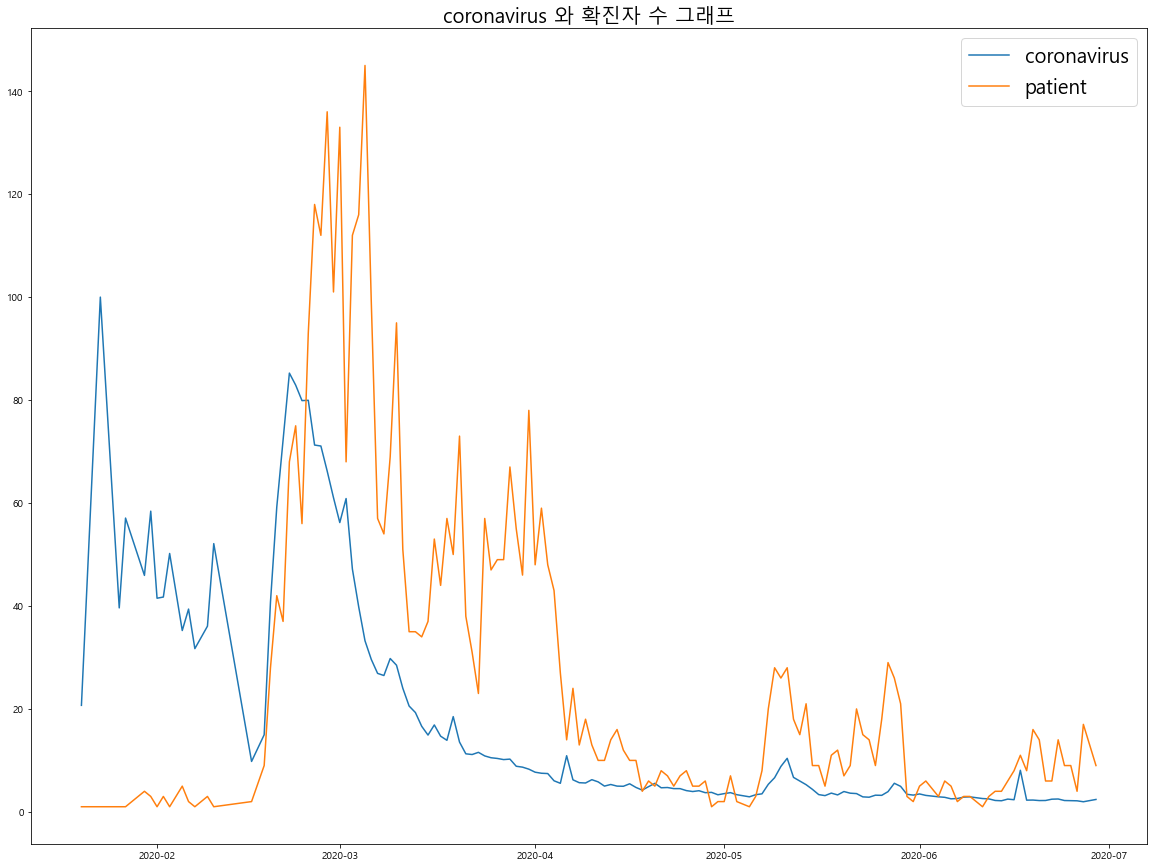

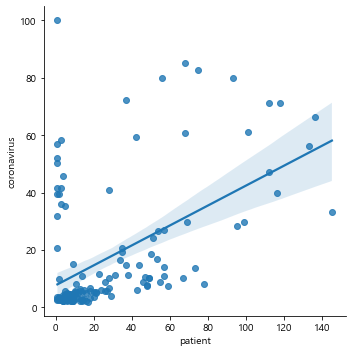

In [90]:
# 한번에 보여주기
for i in ['cold','flu','pneumonia','coronavirus']: 
    plot_(search_patient,i)
    lmp(search_patient,i)

###  다른 y축을 가진 plot을 사용 -> 비율 비교

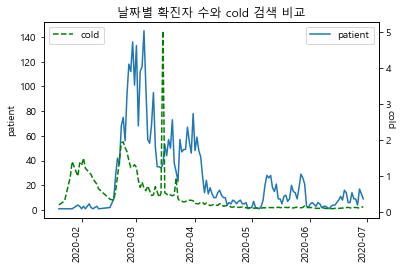

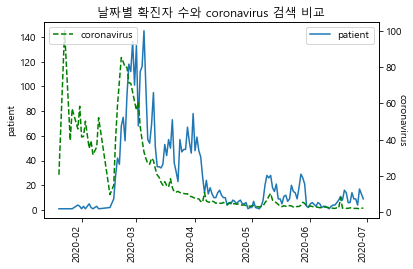

In [91]:
grp(search_patient,'cold')
grp(search_patient,'coronavirus')

### 월별 검색어 - 확진자

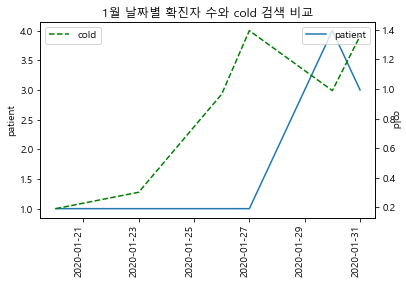

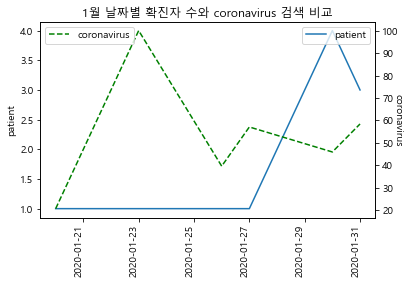

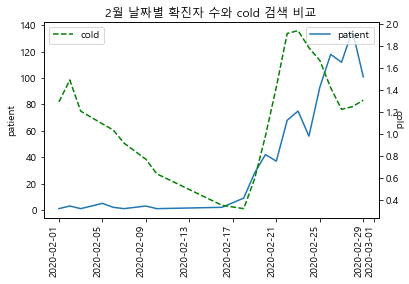

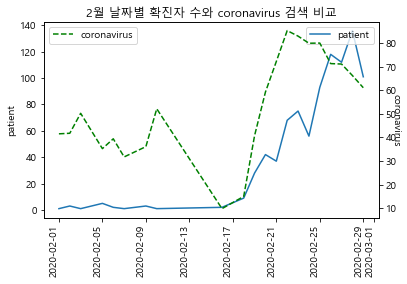

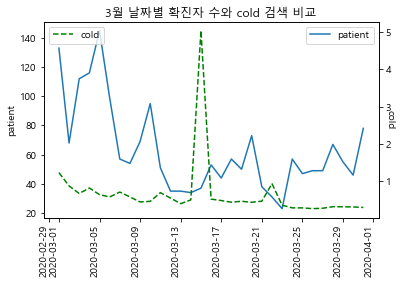

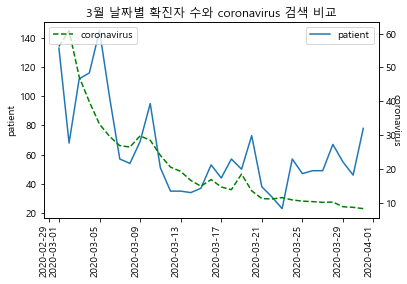

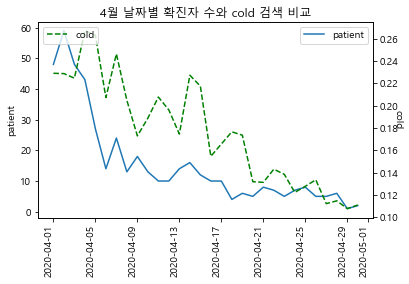

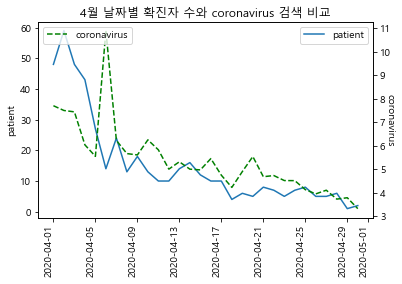

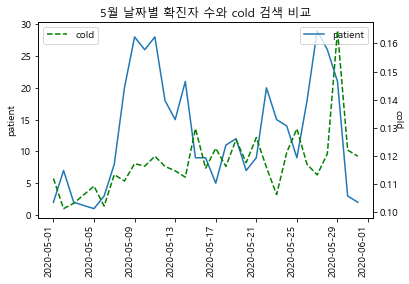

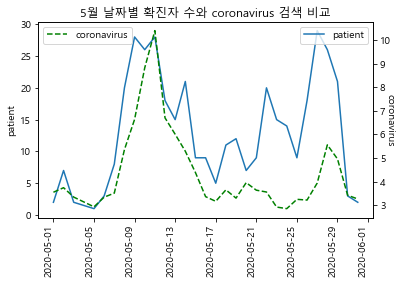

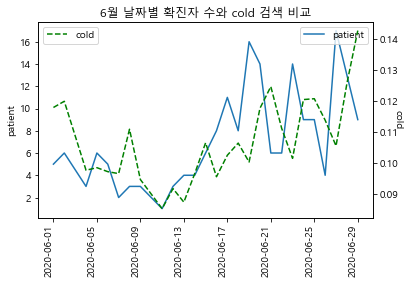

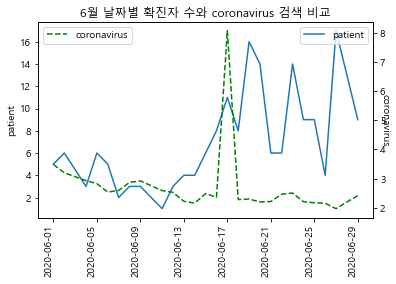

In [92]:
# 한번에 보이기
for i in range(6):
    i+=1
    a = month_(i)
    grp_month(a,i,'cold')
    grp_month(a,i,'coronavirus')

# 결론
- 확진자 수와 검색 트랜드 데이터 간의 관계를 보면 
- cold, coronavirus 검색 횟수가 증가함에따라 확진자 수가 증가하는 모습을 볼 수 있다. 
- 따라서 cold, coronavirus 검색어와 상관관계가 있다고 판단되어짐. 
- 이후의 시각화는 cold, coronavirus 열을 사용하여 진행함.

## 4.정책시행일-확진자분석 

### 날짜
- 확진자 수 - 정책 시행 일
- 확진자 수 - 정책 유형 별

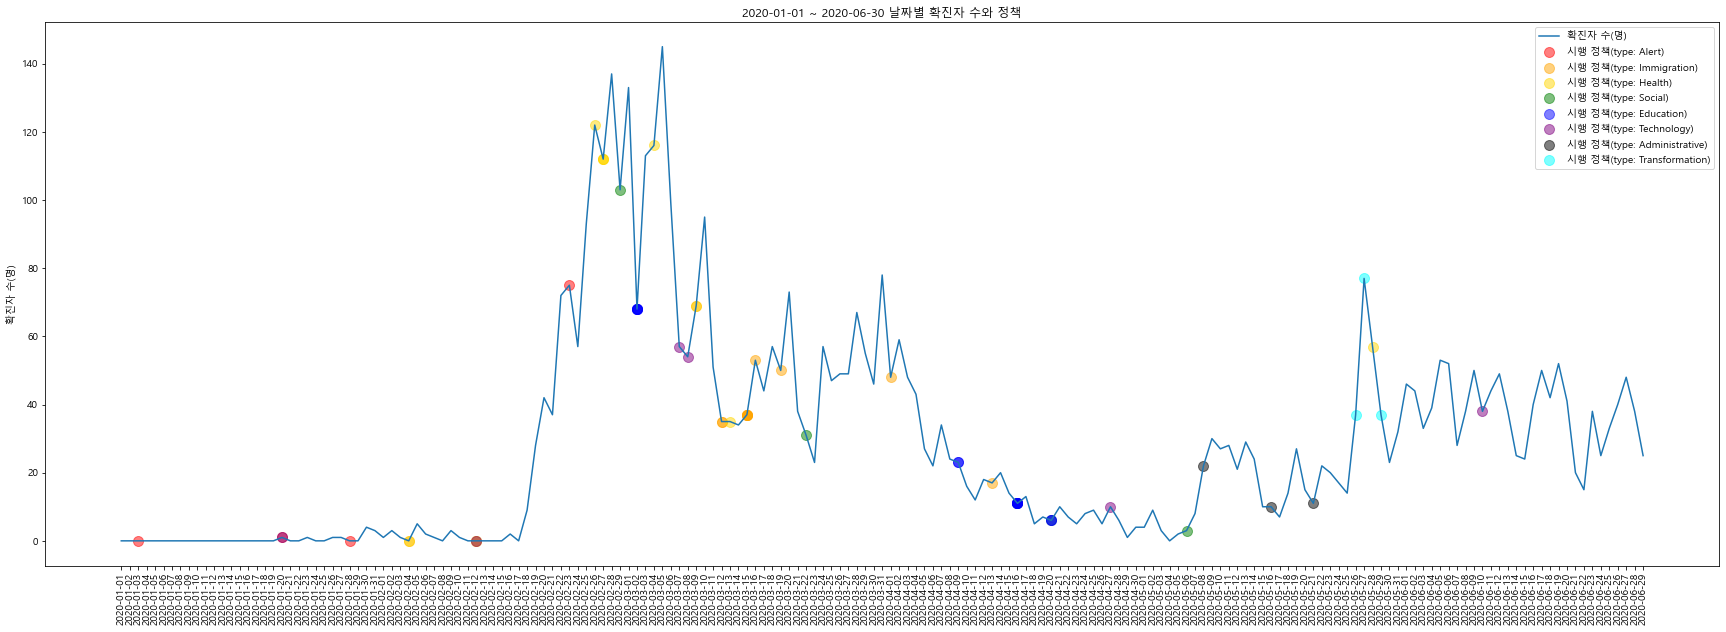

In [93]:
# 정책 시행일 - 확진자 수
plt.figure(figsize=(30, 10))

plt.plot(m1['date'], m1['patient_count'], label='확진자 수(명)')

some_list = []
#plt.scatter(m2['start_date'], m2['patient_count'])
for r in m2.values:
    if r[1] == 'Alert':
        plt.scatter(r[0], r[3], color='red', alpha=0.5, s=100,
                    label='시행 정책(type: Alert)' if 'Alert' not in some_list else '')
        if 'Alert' not in some_list: some_list.append('Alert')
        
    elif r[1] == 'Immigration':
        plt.scatter(r[0], r[3], color='orange', alpha=0.5, s=100,
                    label='시행 정책(type: Immigration)' if 'Immigration' not in some_list else '')
        if 'Immigration' not in some_list: some_list.append('Immigration')
        
    elif r[1] == 'Health':
        plt.scatter(r[0], r[3], color='gold', alpha=0.5, s=100,
                    label='시행 정책(type: Health)' if 'Health' not in some_list else '')
        if 'Health' not in some_list: some_list.append('Health')
        
    elif r[1] == 'Social':
        plt.scatter(r[0], r[3], color='green', alpha=0.5, s=100,
                    label='시행 정책(type: Social)' if 'Social' not in some_list else '')
        if 'Social' not in some_list: some_list.append('Social')
        
    elif r[1] == 'Education':
        plt.scatter(r[0], r[3], color='blue', alpha=0.5, s=100,
                    label='시행 정책(type: Education)' if 'Education' not in some_list else '')
        if 'Education' not in some_list: some_list.append('Education')
        
    elif r[1] == 'Technology':
        plt.scatter(r[0], r[3], color='purple', alpha=0.5, s=100,
                    label='시행 정책(type: Technology)' if 'Technology' not in some_list else '')
        if 'Technology' not in some_list: some_list.append('Technology')
        
    elif r[1] == 'Administrative':
        plt.scatter(r[0], r[3], color='black', alpha=0.5, s=100,
                    label='시행 정책(type: Administrative)' if 'Administrative' not in some_list else '')
        if 'Administrative' not in some_list: some_list.append('Administrative')
        
    elif r[1] == 'Transformation':
        plt.scatter(r[0], r[3], color='cyan', alpha=0.5, s=100,
                    label='시행 정책(type: Transformation)' if 'Transformation' not in some_list else '')
        if 'Transformation' not in some_list: some_list.append('Transformation')
        
plt.xticks(rotation = 90) # 90도로 바꿨습니다.
plt.ylabel('확진자 수(명)')
plt.title('2020-01-01 ~ 2020-06-30 날짜별 확진자 수와 정책')

plt.legend()
plt.show()

In [94]:
types = m2['type'].unique()
types

array(['Alert', 'Immigration', 'Health', 'Social', 'Education',
       'Technology', 'Administrative', 'Transformation'], dtype=object)

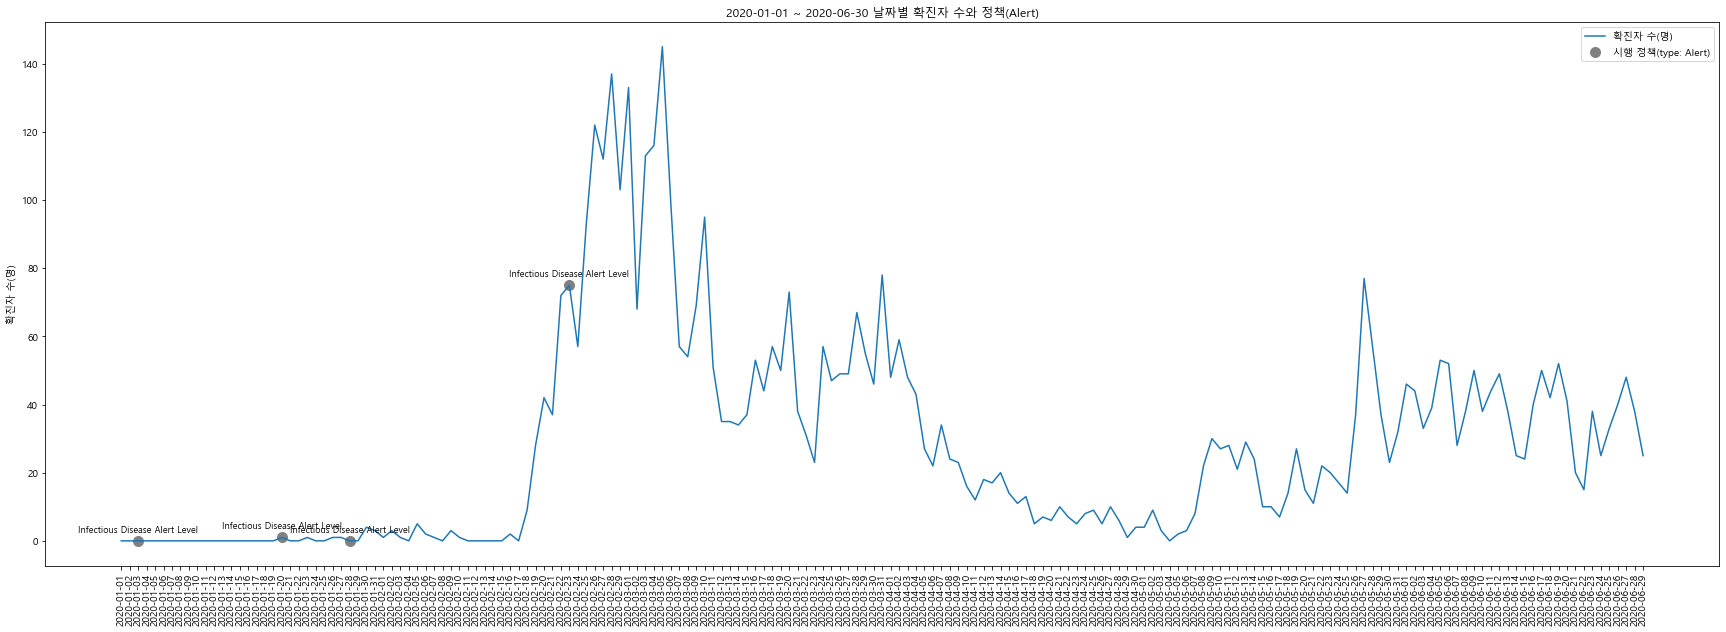

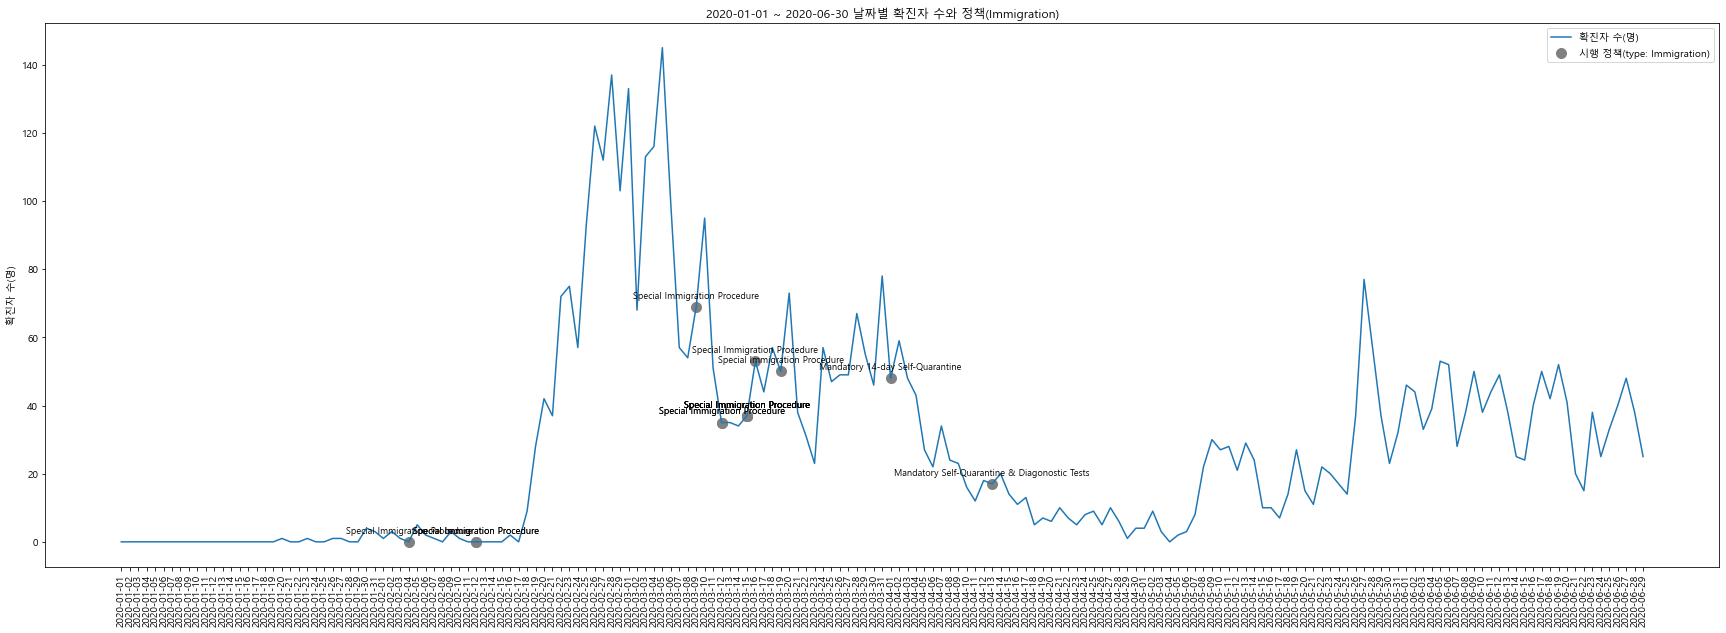

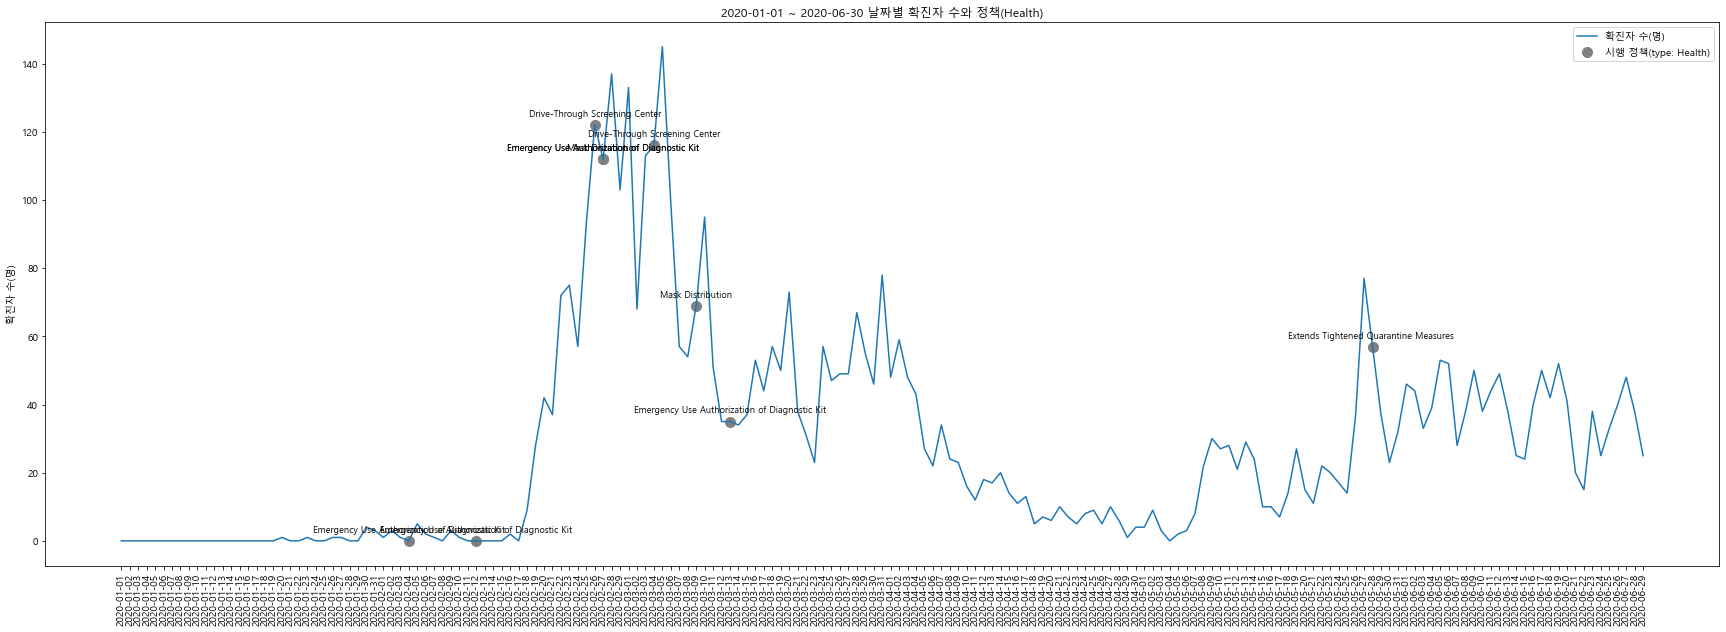

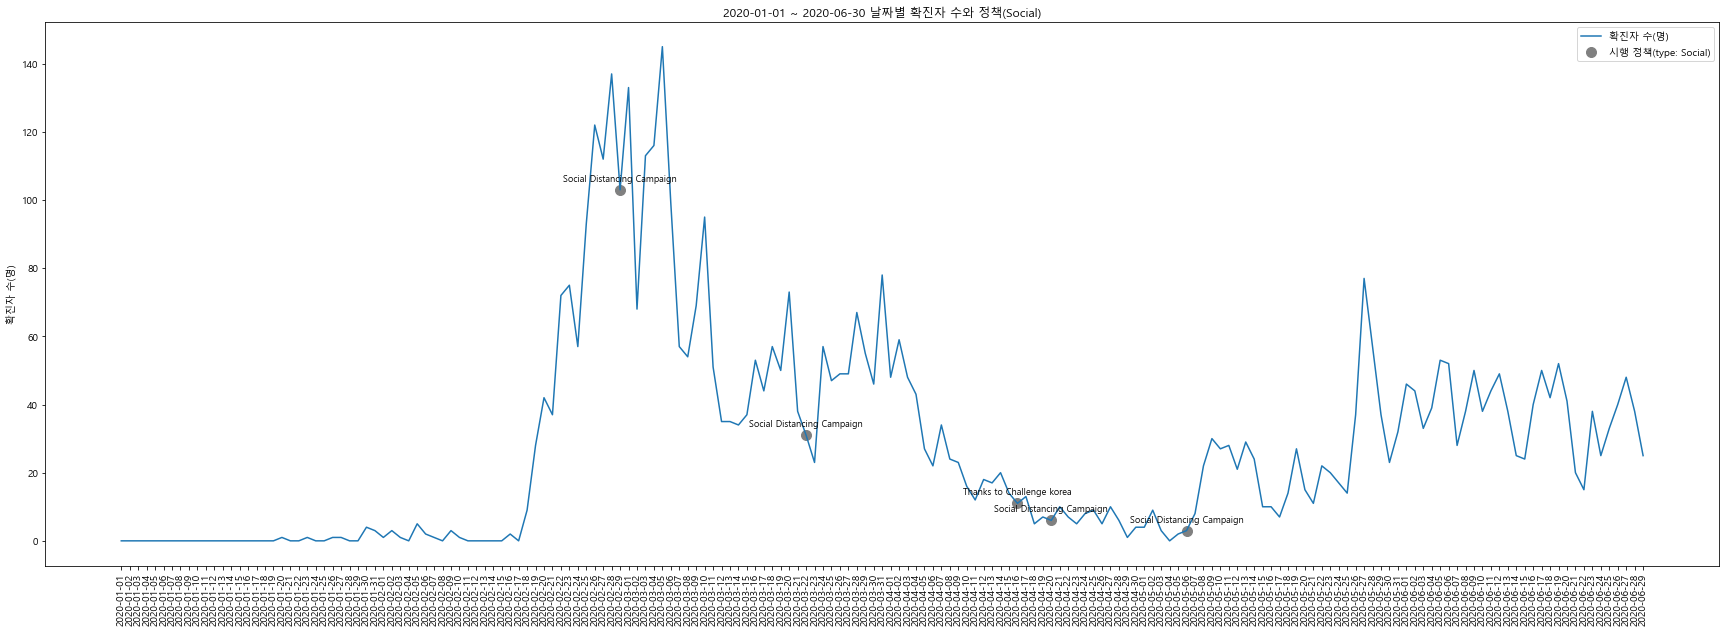

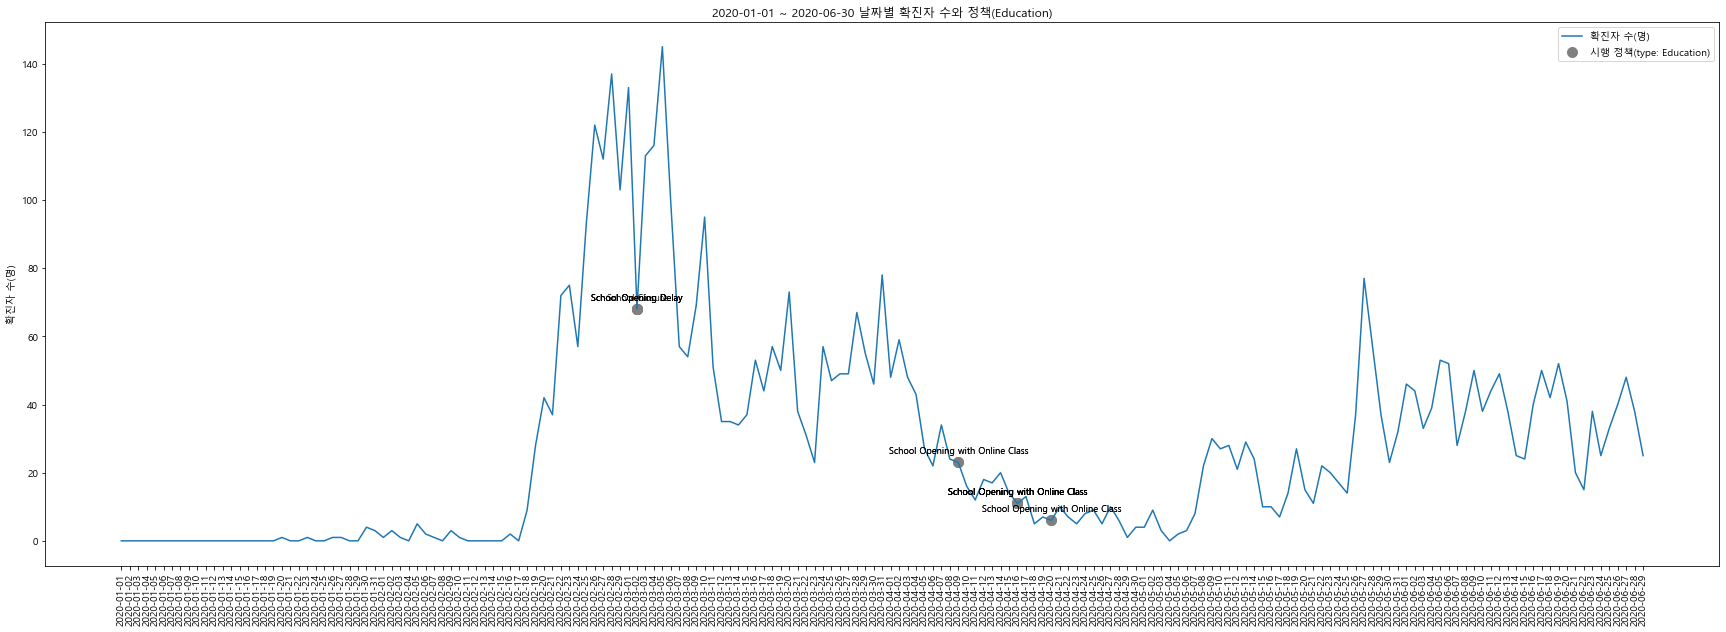

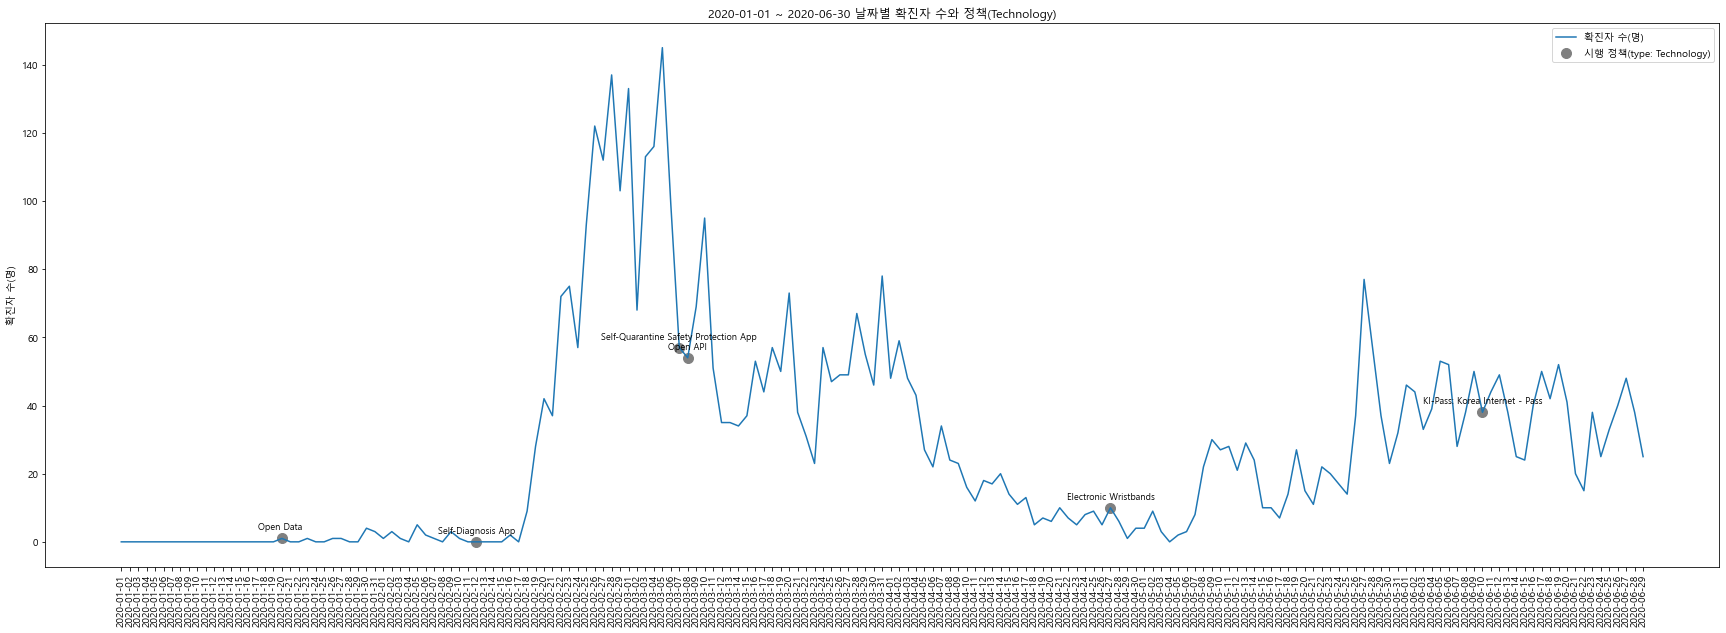

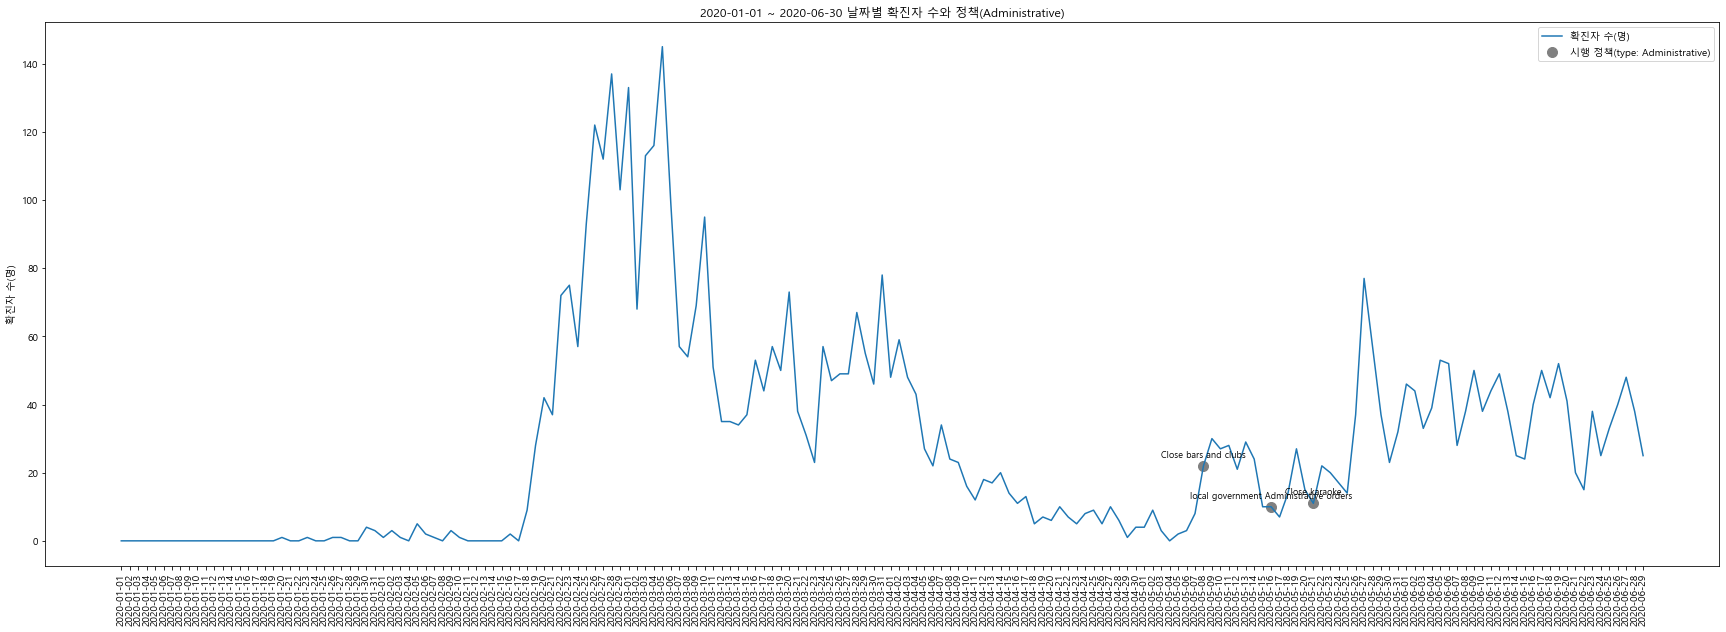

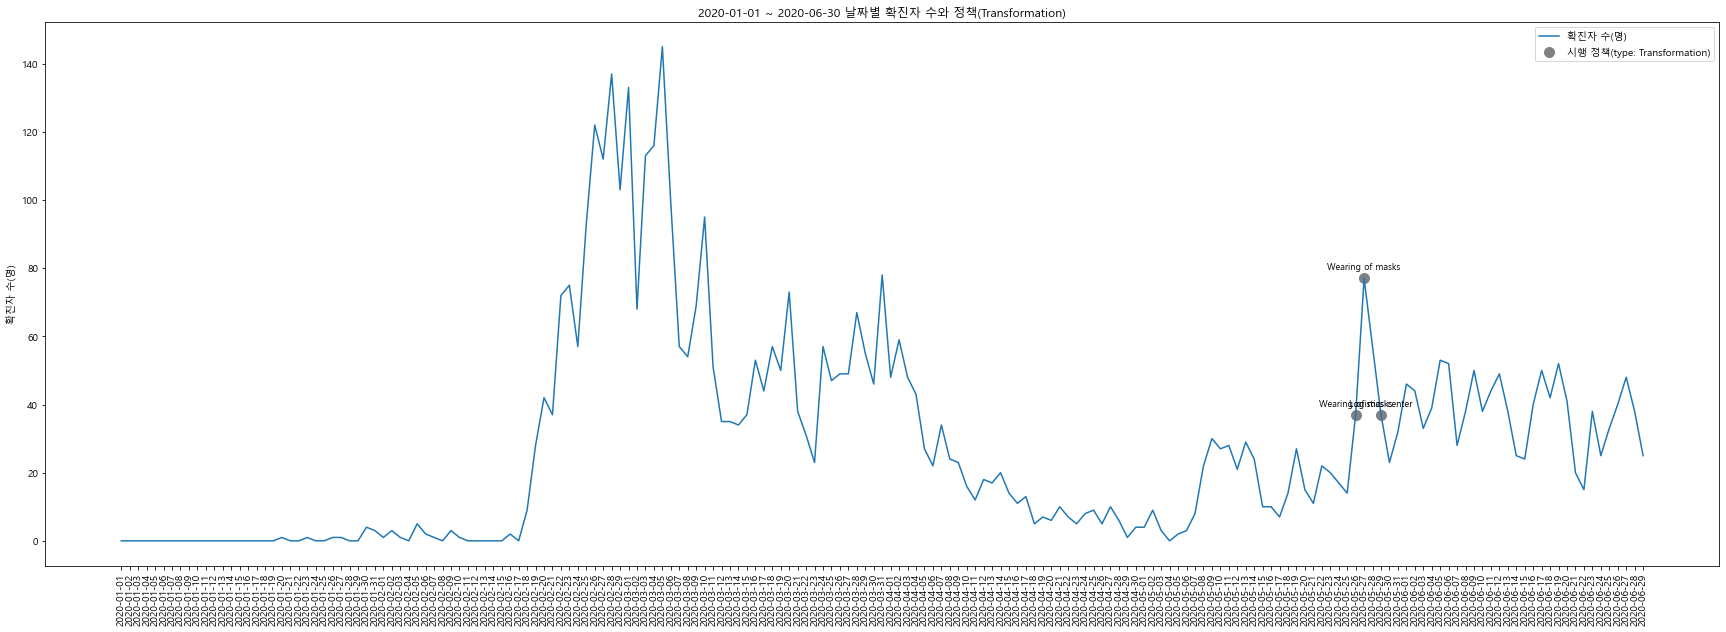

In [95]:
# 정책 유형별 - 확진자 수
for i in range(len(types)):
    plt.figure(figsize=(30, 10))

    plt.plot(m1['date'], m1['patient_count'], label='확진자 수(명)')
    
    flag = True
    for r in m2.values:
        if r[1] == types[i]:
            plt.scatter(r[0], r[3], color='gray', s=100,
                        label='시행 정책(type: '+types[i]+')' if flag else '')
            flag = False
            
            plt.text(r[0], r[3]+2, r[2],
                     fontsize = 9, 
                     color='black',
                     horizontalalignment='center',
                     verticalalignment='bottom')

    plt.xticks(rotation = 90) # 90도로 바꿨습니다.
    plt.ylabel('확진자 수(명)')
    plt.title('2020-01-01 ~ 2020-06-30 날짜별 확진자 수와 정책('+types[i]+')')
    
    plt.legend()
    plt.show()

# Competition 발표에 쓰인 시각화 코드

### ppt7
검색데이터의 'coronavirus' 검색 수와 확진자 수의 상관관계 파악

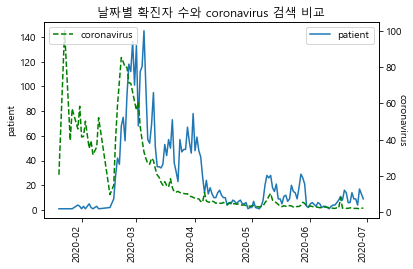

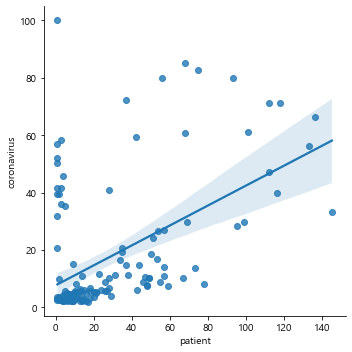

In [96]:
# 'coronavirus' 검색 - 확진자 수 관계
grp(search_patient,'coronavirus')
lmp(search_patient,'coronavirus')

### ppt8
검색 데이터의 'cold' 검색수와 확진자 수의 상관관계 파악

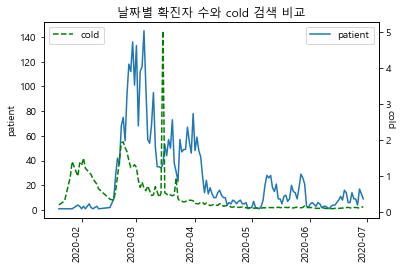

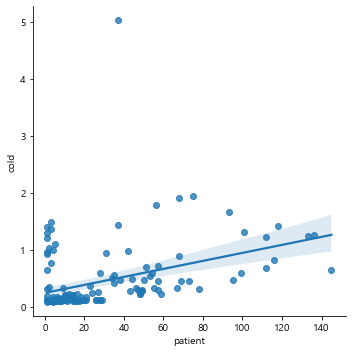

In [97]:
# 'cold' 검색 - 확진자 수 관계
grp(search_patient,'cold')
lmp(search_patient,'cold')

### ppt9
연령이 20대~30대인 환자는 코로나에 확진되어도 사망률이 매우 낮다 \
연령이 60대이상인 환자는 사망률이 크다

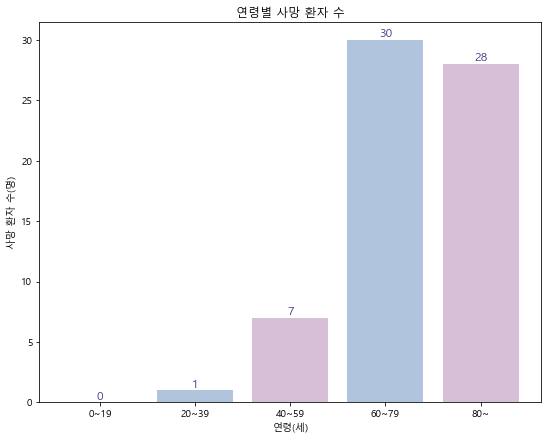

In [98]:
# 연령별 확진자 수
plt.figure(figsize = (9, 7))

plt.bar(age_level, deceased_age, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(age_level):
    plt.text(v, deceased_age[i], deceased_age[i],
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('사망 환자 수(명)')
plt.title('연령별 사망 환자 수')

plt.show()

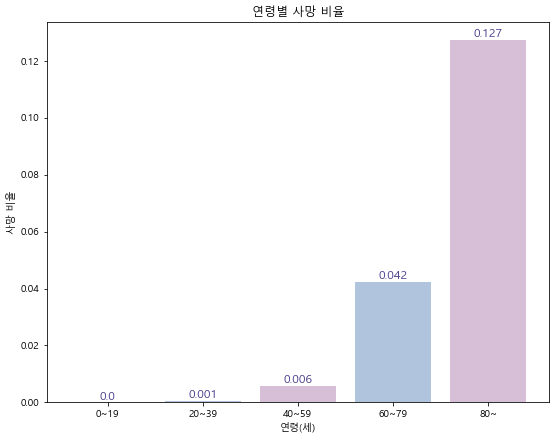

In [99]:
# 연령별 사망 비율
plt.figure(figsize = (9, 7))

plt.bar(age_level, deceased_ratio_age, width=0.8, color=['thistle', 'lightsteelblue'])

for i, v in enumerate(age_level):
    plt.text(v, deceased_ratio_age[i], round(deceased_ratio_age[i], 3),
             fontsize = 12, 
             color='darkslateblue',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연령(세)')
plt.ylabel('사망 비율')
plt.title('연령별 사망 비율')

plt.show()

### ppt10
지역별로 나누어 보니 연령별 확진 비율이 다르다. \
=> 지역마다 노인 비율이 다르기 때문이라고 추측

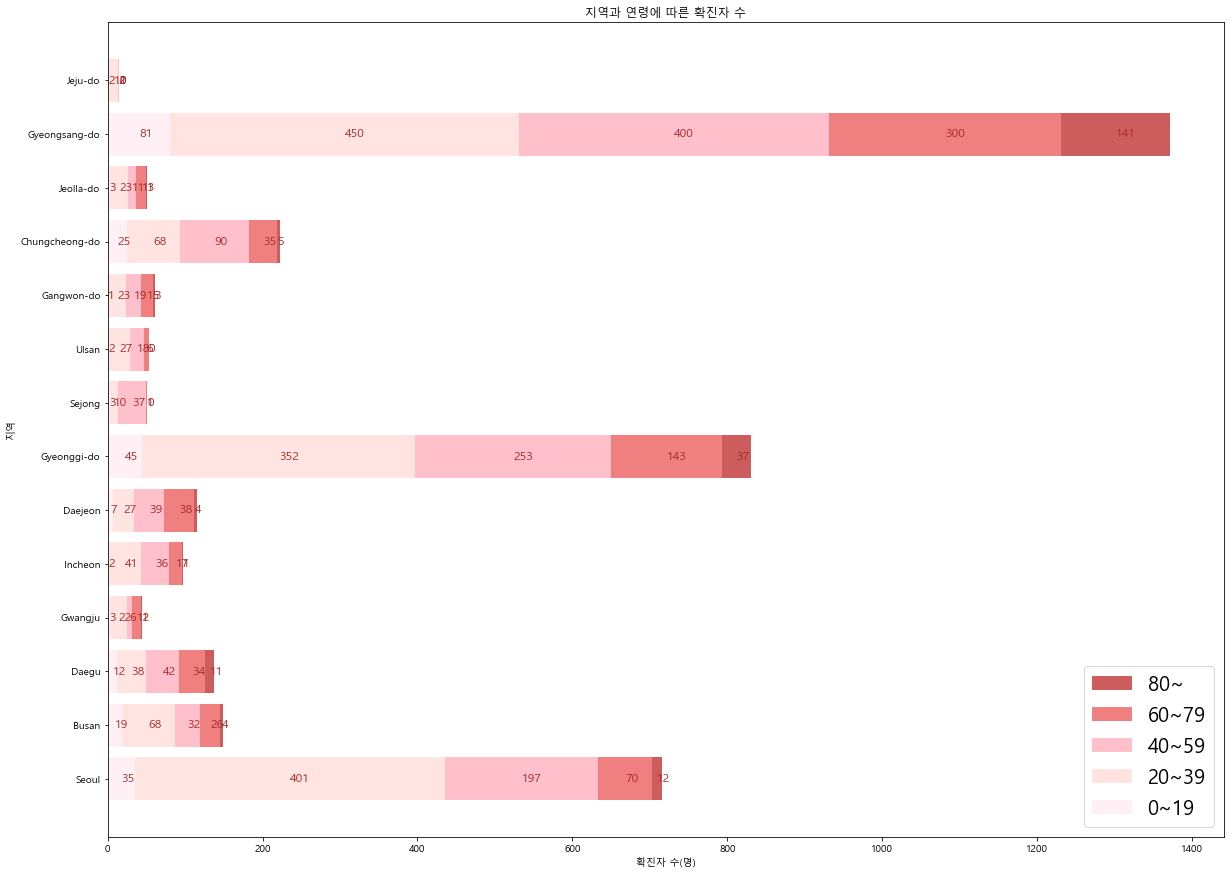

In [100]:
plt.figure(figsize = (20, 15))

plt.barh(region, al_r[4], left=np.sum(al_r[:4], axis=0), label=age_level[4], color='indianred')
plt.barh(region, al_r[3], left=np.sum(al_r[:3], axis=0), label=age_level[3], color='lightcoral')
plt.barh(region, al_r[2], left=np.sum(al_r[:2], axis=0), label=age_level[2], color='pink')
plt.barh(region, al_r[1], left=np.sum(al_r[:1], axis=0), label=age_level[1], color='mistyrose')
plt.barh(region, al_r[0], label=age_level[0], color='lavenderblush')


n = np.array([np.sum(al_r[:j], axis=0) for j in range(1, len(al_r)+1)])

for k in range(len(n)):
    for i, v in enumerate(n[k]):
        plt.text(v-al_r[k][i]/2, i, al_r[k][i],
                 fontsize = 12, 
                 color='brown',
                 horizontalalignment='left',
                 verticalalignment='center')

plt.xlabel('확진자 수(명)')
plt.ylabel('지역')
plt.title('지역과 연령에 따른 확진자 수')
    
plt.legend(fontsize=20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

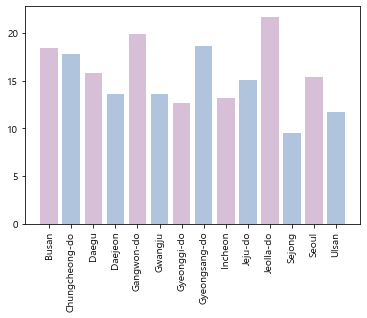

In [101]:
# 전국 노인 비율
plt.bar('province', 'elderly_population_ratio', width=0.8, color=['thistle', 'lightsteelblue'],data=region_code2)
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

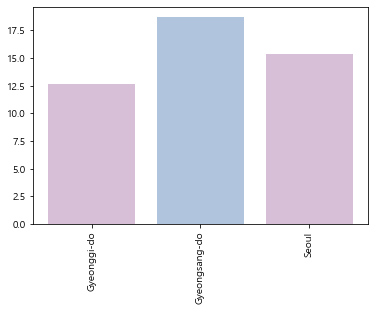

In [102]:
# 서울, 경기, 경북 지역 노인 비율
plt.bar('province', 'elderly_population_ratio', width=0.8, color=['thistle', 'lightsteelblue'],data=region_code3)
plt.xticks(rotation = 90)
plt.show